# Load libraries

In [1]:
library(gridtext)
library(DESeq2)
library(ggplot2)
library(dplyr)
library(ggh4x)
library(MASS)
library(viridis)
library(ggpubr)
library(paletteer)
library(cowplot)
library(colorspace)
library(factoextra)
library(ComplexHeatmap)
library(Rmisc)
library(eulerr)
library(clusterProfiler)
library(ReactomePA)
library(org.Mm.eg.db)
library(circlize)

options(repr.matrix.max.cols=50, repr.matrix.max.rows=500)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



# Import P14 RNA counts

In [2]:
# Import P14 NR & DR counts
P14_cts <- read.csv('/n/groups/neuroduo/Bruno/240904_NS500663_2039_AHVGJ5BGXW/Alignment_3/total_counts_transcript.txt',sep='\t',skip=1)

P14_cts_filt <- P14_cts[,c(1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30)]
rownames(P14_cts_filt) <- P14_cts_filt$Geneid
P14_cts_filt <- P14_cts_filt[,-1]

P14_cts_filt <- P14_cts_filt[-c(25243,25242,25241,25240),]
P14_cts_pos <- P14_cts_filt[,c(4,5,6,10,11,12,16,17,18,22,23,24)]

names(P14_cts_pos) <- c('DR_Cre_pos_r1',
                            'DR_Cre_pos_r2',
                            'DR_Cre_pos_r3',
                            'DR_delCre_pos_r1',
                            'DR_delCre_pos_r2',
                            'DR_delCre_pos_r3',
                            'NR_Cre_pos_r1',
                            'NR_Cre_pos_r2',
                            'NR_Cre_pos_r3',
                            'NR_delCre_pos_r1',
                            'NR_delCre_pos_r2',
                            'NR_delCre_pos_r3')

In [3]:
# Generate P14 metadata
P14_pos_metadata <- data.frame(condition = c(rep('DR',6),rep('NR',6)),
                               genotype = c(rep('cre',3),rep('delta',3),
                                            rep('cre',3),rep('delta',3)),
                               Group = c(rep('DR_Cre',3),rep('DR_delCre',3),
                                            rep('NR_Cre',3),rep('NR_delCre',3)),
                               replicate = c(rep(c('1','2','3'),2),rep(c('1','2','3'),2)))
rownames(P14_pos_metadata) <- colnames(P14_cts_pos)

P14_cts_pos_mat <- as.matrix(P14_cts_pos)
mode(P14_cts_pos_mat) <- "integer" 

In [4]:
# Create dds objects and run DESeq2
P14_dds_pos <- DESeqDataSetFromMatrix(countData = P14_cts_pos_mat,
                              colData = P14_pos_metadata,
                              design = ~ Group)
P14_dds_pos$Group <- relevel(P14_dds_pos$Group, ref = "DR_delCre")
P14_dds_pos <- DESeq(P14_dds_pos)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Import P21 RNA counts

In [5]:
# Import P21 DR counts
P21_DR_counts <- read.csv('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/DR_3T3_total_counts_transcript.txt',sep='')
colnames(P21_DR_counts) <- P21_DR_counts[1,]
P21_DR_counts <- P21_DR_counts[-1,]
P21_DR_counts <- P21_DR_counts[,-c(2,3,4,5,6,7,8,9,10,11,12,13,14)]
rownames(P21_DR_counts) <- P21_DR_counts[,1]
P21_DR_counts <- P21_DR_counts[,-1]

P21_DR_counts_pos <- P21_DR_counts[,c(5,6,7,8,13,14,15,16)]
names(P21_DR_counts_pos) <- c('DR_Cre_pos_R1',
                          'DR_Cre_pos_R2',
                          'DR_Cre_pos_R3',
                          'DR_Cre_pos_R4',
                          'DR_delCre_pos_R1',
                          'DR_delCre_pos_R2',
                          'DR_delCre_pos_R3',
                          'DR_delCre_pos_R4')
P21_DR_counts_pos <- P21_DR_counts_pos[-c(25243,25242,25241,25240),]

# Import P21 NR counts
P21_NR_counts <- read.csv('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/NR_total_counts_transcript2.txt',sep='')
P21_NR_counts_pos <- P21_NR_counts[,-c(2,3,4,5,6,7,8,9,13,14,15)]
rownames(P21_NR_counts_pos) <- P21_NR_counts_pos[,1]
P21_NR_counts_pos <- P21_NR_counts_pos[,-1]

names(P21_NR_counts_pos) <- c('NR_Cre_pos_R1',
                              'NR_Cre_pos_R2',
                              'NR_Cre_pos_R3',
                              'NR_delCre_pos_R1',
                              'NR_delCre_pos_R2',
                              'NR_delCre_pos_R3')
P21_NR_counts_pos <- P21_NR_counts_pos[-c(25241,25240),]

# Combine DR & NR
P21_cts_pos <- cbind(P21_DR_counts_pos, P21_NR_counts_pos)

In [6]:
# Create metadata for P21 GFP+ and GFP- samples
P21_GFP_pos_metadata <- data.frame(Rear = c(rep('DR',8),
                                           rep('NR',6)),
                                  AAV = c(rep('Cre',4),
                                         rep('delCre',4),
                                         rep('Cre',3),
                                         rep('delCre',3)),
                                  Group = c(rep('DR_Cre',4),
                                         rep('DR_delCre',4),
                                         rep('NR_Cre',3),
                                         rep('NR_delCre',3)))

rownames(P21_GFP_pos_metadata) <- colnames(P21_cts_pos)

P21_cts_pos_mat <- as.matrix(P21_cts_pos)
mode(P21_cts_pos_mat) <- "integer" 

In [7]:
# Create dds objects for GFP+ and GFP- samples
P21_dds_pos <- DESeqDataSetFromMatrix(countData = P21_cts_pos_mat,
                              colData = P21_GFP_pos_metadata,
                              design = ~ Group)

P21_dds_pos$Group <- relevel(P21_dds_pos$Group, ref = "DR_delCre")

# Run DESeq2
P21_dds_pos <- DESeq(P21_dds_pos)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Import P28 RNA counts & run DESeq2

In [8]:
P28_cts <- read.csv('/n/groups/neuroduo/Bruno/241127_NS500663_2067_AH7CMWBGYW/Alignment_2/total_counts_transcript.txt',sep='')
colnames(P28_cts) <- P28_cts[1,]
P28_cts <- P28_cts[-1,]
P28_cts <- P28_cts[,-c(2,3,4,5,6)]
rownames(P28_cts) <- P28_cts[,1]
P28_cts <- P28_cts[,-1]
P28_cts <- P28_cts[,-c(16,17,18,19,20,21,22,23,24)]

names(P28_cts) <- c('DR_Cre_neg_R1',
                   'DR_Cre_neg_R2',
                   'DR_Cre_pos_R1',
                   'DR_Cre_pos_R2',
                   'DR_delCre_neg_R1',
                   'DR_delCre_neg_R2',
                   'DR_delCre_pos_R1',
                   'DR_delCre_pos_R2',
                   'NR_Cre_neg_R1',
                   'NR_Cre_neg_R2',
                   'NR_Cre_pos_R1',
                   'NR_Cre_pos_R2',
                   'NR_delCre_neg_R1',
                   'NR_delCre_neg_R2',
                   'NR_delCre_pos_R1')
P28_cts <- P28_cts[-c(25243,25242,25241,25240),]
P28_cts_pos <- P28_cts[,c(3,4,7,8,11,12,15)]

In [9]:
# Combine w/rd 2 of samples
P28_cts_rd2 <- read.csv('/n/groups/neuroduo/Bruno/241210_NS500663_2072_AH7CGWBGYW/Alignment_2/total_counts_transcript.txt',sep='')
colnames(P28_cts_rd2) <- P28_cts_rd2[1,]
P28_cts_rd2 <- P28_cts_rd2[-1,]
P28_cts_rd2 <- P28_cts_rd2[,-c(2,3,4,5,6,7,8,23,24,25,26,27,28)]
rownames(P28_cts_rd2) <- P28_cts_rd2[,1]
P28_cts_rd2 <- P28_cts_rd2[,-1]
P28_cts_rd2 <- P28_cts_rd2[,-c(15,16,17,18,19,20,21,22)]

names(P28_cts_rd2) <- c('DR_Cre_neg_R3',
                        'DR_Cre_neg_R4',
                        'DR_Cre_pos_R3',
                        'DR_Cre_pos_R4',
                        'DR_delCre_neg_R3',
                        'DR_delCre_neg_R4',
                        'DR_delCre_pos_R3',
                        'DR_delCre_pos_R4',
                        'NR_Cre_neg_R3',
                        'NR_Cre_pos_R3',
                        'NR_delCre_neg_R3',
                        'NR_delCre_neg_R4',
                        'NR_delCre_pos_R3',
                        'NR_delCre_pos_R4')
P28_cts_rd2 <- P28_cts_rd2[-c(25243,25242,25241,25240),]
P28_cts_rd2_pos <- P28_cts_rd2[,c(3,4,7,8,10,13,14)]

In [10]:
# Combine 2 datasets
P28_cts_pos_combine <- cbind(P28_cts_pos[,c(1,2)],
                             P28_cts_rd2_pos[,c(1,2)],
                             P28_cts_pos[,c(3,4)],
                             P28_cts_rd2_pos[,c(3,4)],
                             P28_cts_pos[,c(5,6)],
                             P28_cts_rd2_pos[,5,drop=F],
                             P28_cts_pos[,7,drop=F],
                             P28_cts_rd2_pos[,c(6,7)])

In [11]:
# Create metadata for P28 GFP+ & GFP- samples
P28_GFP_pos_metadata <- data.frame(Rear = c(rep('DR',8),
                                           rep('NR',6)),
                                  AAV = c(rep('Cre',4),
                                         rep('delCre',4),
                                         rep('Cre',3),
                                         rep('delCre',3)),
                                  Group = c(rep('DR_Cre',4),
                                         rep('DR_delCre',4),
                                         rep('NR_Cre',3),
                                         rep('NR_delCre',3)))

rownames(P28_GFP_pos_metadata) <- colnames(P28_cts_pos_combine)

P28_cts_pos_mat <- as.matrix(P28_cts_pos_combine)
mode(P28_cts_pos_mat) <- "integer" 

In [12]:
# Create dds object & run DESeq2
P28_dds_pos <- DESeqDataSetFromMatrix(countData = P28_cts_pos_mat,
                              colData = P28_GFP_pos_metadata,
                              design = ~ Group)

P28_dds_pos$Group <- relevel(P28_dds_pos$Group, ref = "DR_delCre")

P28_dds_pos <- DESeq(P28_dds_pos)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Merge datasets for combined analysis

In [13]:
# Add timepoint to sample name
names(P14_cts_pos) <- paste0('P14_',names(P14_cts_pos))
names(P21_cts_pos) <- paste0('P21_',names(P21_cts_pos))
names(P28_cts_pos_combine) <- paste0('P28_',names(P28_cts_pos_combine))

In [14]:
tot_cts_pos <- cbind(P14_cts_pos, P21_cts_pos, P28_cts_pos_combine)

In [26]:
# Export raw count table
write.table(tot_cts_pos,'/n/groups/neuroduo/Bruno/GEO_upload/RNA/tot_cts_pos_filt.csv', quote=FALSE, sep=',')

In [15]:
# Generate metadata
tot_pos_metadata <- data.frame(Rear = c(rep('DR',6),
                                        rep('NR',6),
                                        rep('DR',8),
                                        rep('NR',6),
                                        rep('DR',8),
                                        rep('NR',6)),
                               AAV = c(rep('Cre',3),
                                       rep('delCre',3),
                                       rep('Cre',3),
                                       rep('delCre',3),
                                       rep('Cre',4),
                                       rep('delCre',4),
                                       rep('Cre',3),
                                       rep('delCre',3),
                                       rep('Cre',4),
                                       rep('delCre',4),
                                       rep('Cre',3),
                                       rep('delCre',3)),
                               Timepoint = c(rep('P14',12),
                                             rep('P21',14),
                                             rep('P28',14)),
                                Group = c(rep('P14_DR_Cre',3),
                                          rep('P14_DR_delCre',3),
                                          rep('P14_NR_Cre',3),
                                          rep('P14_NR_delCre',3),
                                          rep('P21_DR_Cre',4),
                                          rep('P21_DR_delCre',4),
                                          rep('P21_NR_Cre',3),
                                          rep('P21_NR_delCre',3),
                                          rep('P28_DR_Cre',4),
                                          rep('P28_DR_delCre',4),
                                          rep('P28_NR_Cre',3),
                                          rep('P28_NR_delCre',3)))

rownames(tot_pos_metadata) <- colnames(tot_cts_pos)

tot_cts_pos_mat <- as.matrix(tot_cts_pos)
mode(tot_cts_pos_mat) <- "integer" 

In [16]:
# Create dds object
tot_dds_pos <- DESeqDataSetFromMatrix(countData = tot_cts_pos_mat,
                              colData = tot_pos_metadata,
                              design = ~ Group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [17]:
# Run DESeq2
tot_dds_pos <- DESeq(tot_dds_pos)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



using ntop=500 top features by variance

using ntop=500 top features by variance

using ntop=500 top features by variance



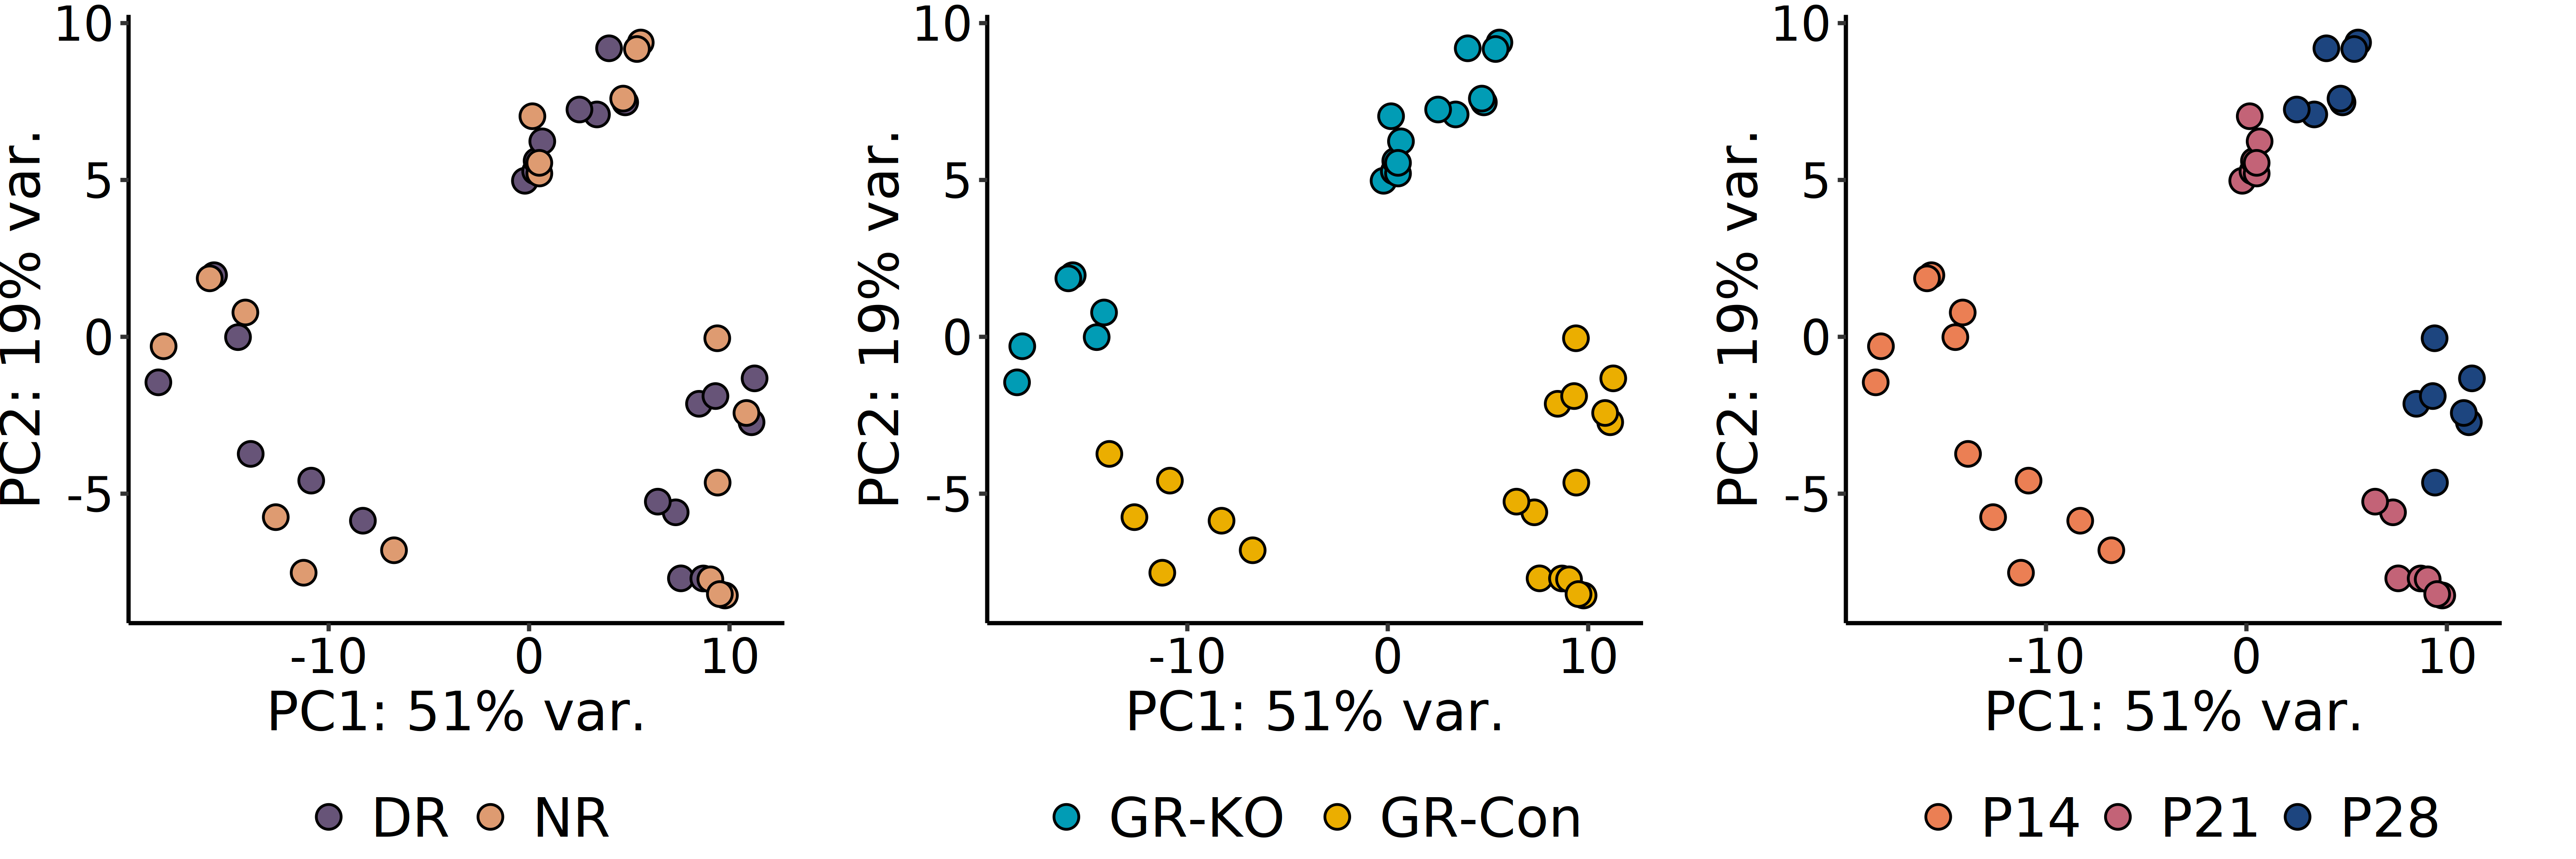

In [18]:
# Generate PCA plot of all samples
options(repr.plot.width=12, repr.plot.height=4,repr.plot.res=500)

p1 <- plotPCA(vst(tot_dds_pos), intgroup = 'Rear',returnData =T) 
p1_plot <- ggplot(p1,aes(x=PC1, y=PC2,fill=group))+ theme_classic() + 
theme(axis.text=element_text(size=16,color='black'),
      axis.title=element_text(size=18,color='black'),
    legend.text=element_text(size=18,color='black'),
      legend.position='bottom',
      legend.title=element_blank(),
     plot.margin = margin(5, 25, 0, 0)) +
geom_point(
       colour="black",pch=21, size=3.5)+ 
ylab('PC2: 19% var.') + xlab('PC1: 51% var.')+
scale_fill_manual(labels = c('DR', 'NR'), values = c('#675478','#DE9B71'))+ ylab('PC2: 19% var.') + xlab('PC1: 51% var.')

p2 <- plotPCA(vst(tot_dds_pos), intgroup = 'AAV',returnData =T) 
p2_plot <- ggplot(p2,aes(x=PC1, y=PC2,fill=group))+ theme_classic() + 
theme(axis.text=element_text(size=16,color='black'),
      axis.title=element_text(size=18,color='black'),
    legend.text=element_text(size=18,color='black'),
      legend.position='bottom',
      legend.title=element_blank(),
     plot.margin = margin(5, 25, 0, 0)) +
geom_point(
       colour="black",pch=21, size=3.5)+ 
ylab('PC2: 19% var.') + xlab('PC1: 51% var.') +
scale_fill_manual(labels = c('GR-KO', 'GR-Con'), values = rev(c('#EBAE00','#019CB5'))) + ylab('PC2: 19% var.') + xlab('PC1: 51% var.')


p3 <- plotPCA(vst(tot_dds_pos), intgroup = 'Timepoint',returnData =T) 
p3_plot <- ggplot(p3,aes(x=PC1, y=PC2,fill=group))+ theme_classic() + 
theme(axis.text=element_text(size=16,color='black'),
      axis.title=element_text(size=18,color='black'),
    legend.text=element_text(size=18,color='black'),
          legend.position='bottom',
      legend.title=element_blank(),
     plot.margin = margin(5, 0, 0, 0)) +
geom_point(
       colour="black",pch=21, size=3.5)+ 
ylab('PC2: 19% var.') + xlab('PC1: 51% var.') + scale_fill_manual(labels = c('P14', 'P21', 'P28'), 
                                                                                    values = c(paletteer_d("PNWColors::Sunset2")[4],
                                                                                               paletteer_d("PNWColors::Sunset2")[3],
                                                                                               paletteer_d("PNWColors::Sunset2")[1]))
plot_grid(p1_plot,p2_plot,p3_plot,ncol=3,align = "hv")

# Generate pair-wise strip plots

In [19]:
P28_rear_res <- as.data.frame(na.omit(results(tot_dds_pos,contrast=c("Group","P28_NR_delCre","P28_DR_delCre"))))
P21_rear_res <- as.data.frame(na.omit(results(tot_dds_pos,contrast=c("Group","P21_NR_delCre","P21_DR_delCre"))))
P14_rear_res <- as.data.frame(na.omit(results(tot_dds_pos,contrast=c("Group","P14_NR_delCre","P14_DR_delCre"))))

In [22]:
saveRDS(P21_rear_res, '/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_rear_res.rds')

In [20]:
P28_GR_dep_res <- as.data.frame(na.omit(results(tot_dds_pos,lfcThreshold=0.1,altHypothesis = "greaterAbs2014",contrast=c("Group","P28_NR_Cre","P28_NR_delCre"))))
P21_GR_dep_res <- as.data.frame(na.omit(results(tot_dds_pos,lfcThreshold=0.1,altHypothesis = "greaterAbs2014",contrast=c("Group","P21_NR_Cre","P21_NR_delCre"))))
P14_GR_dep_res <- as.data.frame(na.omit(results(tot_dds_pos,lfcThreshold=0.1,altHypothesis = "greaterAbs2014",contrast=c("Group","P14_NR_Cre","P14_NR_delCre"))))

In [25]:
# Export as tables
write.csv(P14_rear_res,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P14_rear_res_supptable7.csv')
write.csv(P21_rear_res,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_rear_res_supptable7.csv')
write.csv(P28_rear_res,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P28_rear_res_supptable7.csv')

In [21]:
# Export as tables
write.csv(P14_GR_dep_res,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P14_GR_dep_res_supptable7.csv')
write.csv(P21_GR_dep_res,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res_supptable7.csv')
write.csv(P28_GR_dep_res,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P28_GR_dep_res_supptable7.csv')

In [21]:
# Combine results to list
GR_dep_res_list <- list(P14=P14_GR_dep_res,
                        P21=P21_GR_dep_res,
                        P28=P28_GR_dep_res)

# Categorize genes based on FC & FDR
GR_dep_res_list <- lapply(GR_dep_res_list, function(x) {
    x$category <- ifelse((x$log2FoldChange > 0) & (x$padj < 0.05), 'Up',
           ifelse((x$log2FoldChange < 0) & (x$padj < 0.05), 'Down', 'ns'))
    return(x)
})

# Add a new column with the name of the list element
GR_dep_res_list <- lapply(names(GR_dep_res_list), function(x) {
  df <- GR_dep_res_list[[x]]
  df$Timepoint <- sub('P', '', x)
  return(df)
})

GR_dep_res_list <- lapply(GR_dep_res_list, function(x) {
   x$gene <- rownames(x)
   return(x)
})

# Merge to dataframe
GR_dep_res_list_rbind <- do.call(rbind,GR_dep_res_list)

# Set plotting order
GR_dep_res_list_rbind$category <- factor(GR_dep_res_list_rbind$category, levels = c('ns','Up','Down'))

# Set Timepoint order
GR_dep_res_list_rbind$Timepoint <- factor(GR_dep_res_list_rbind$Timepoint, levels = c('14',
                                                                                    '21',
                                                                                    '28'))

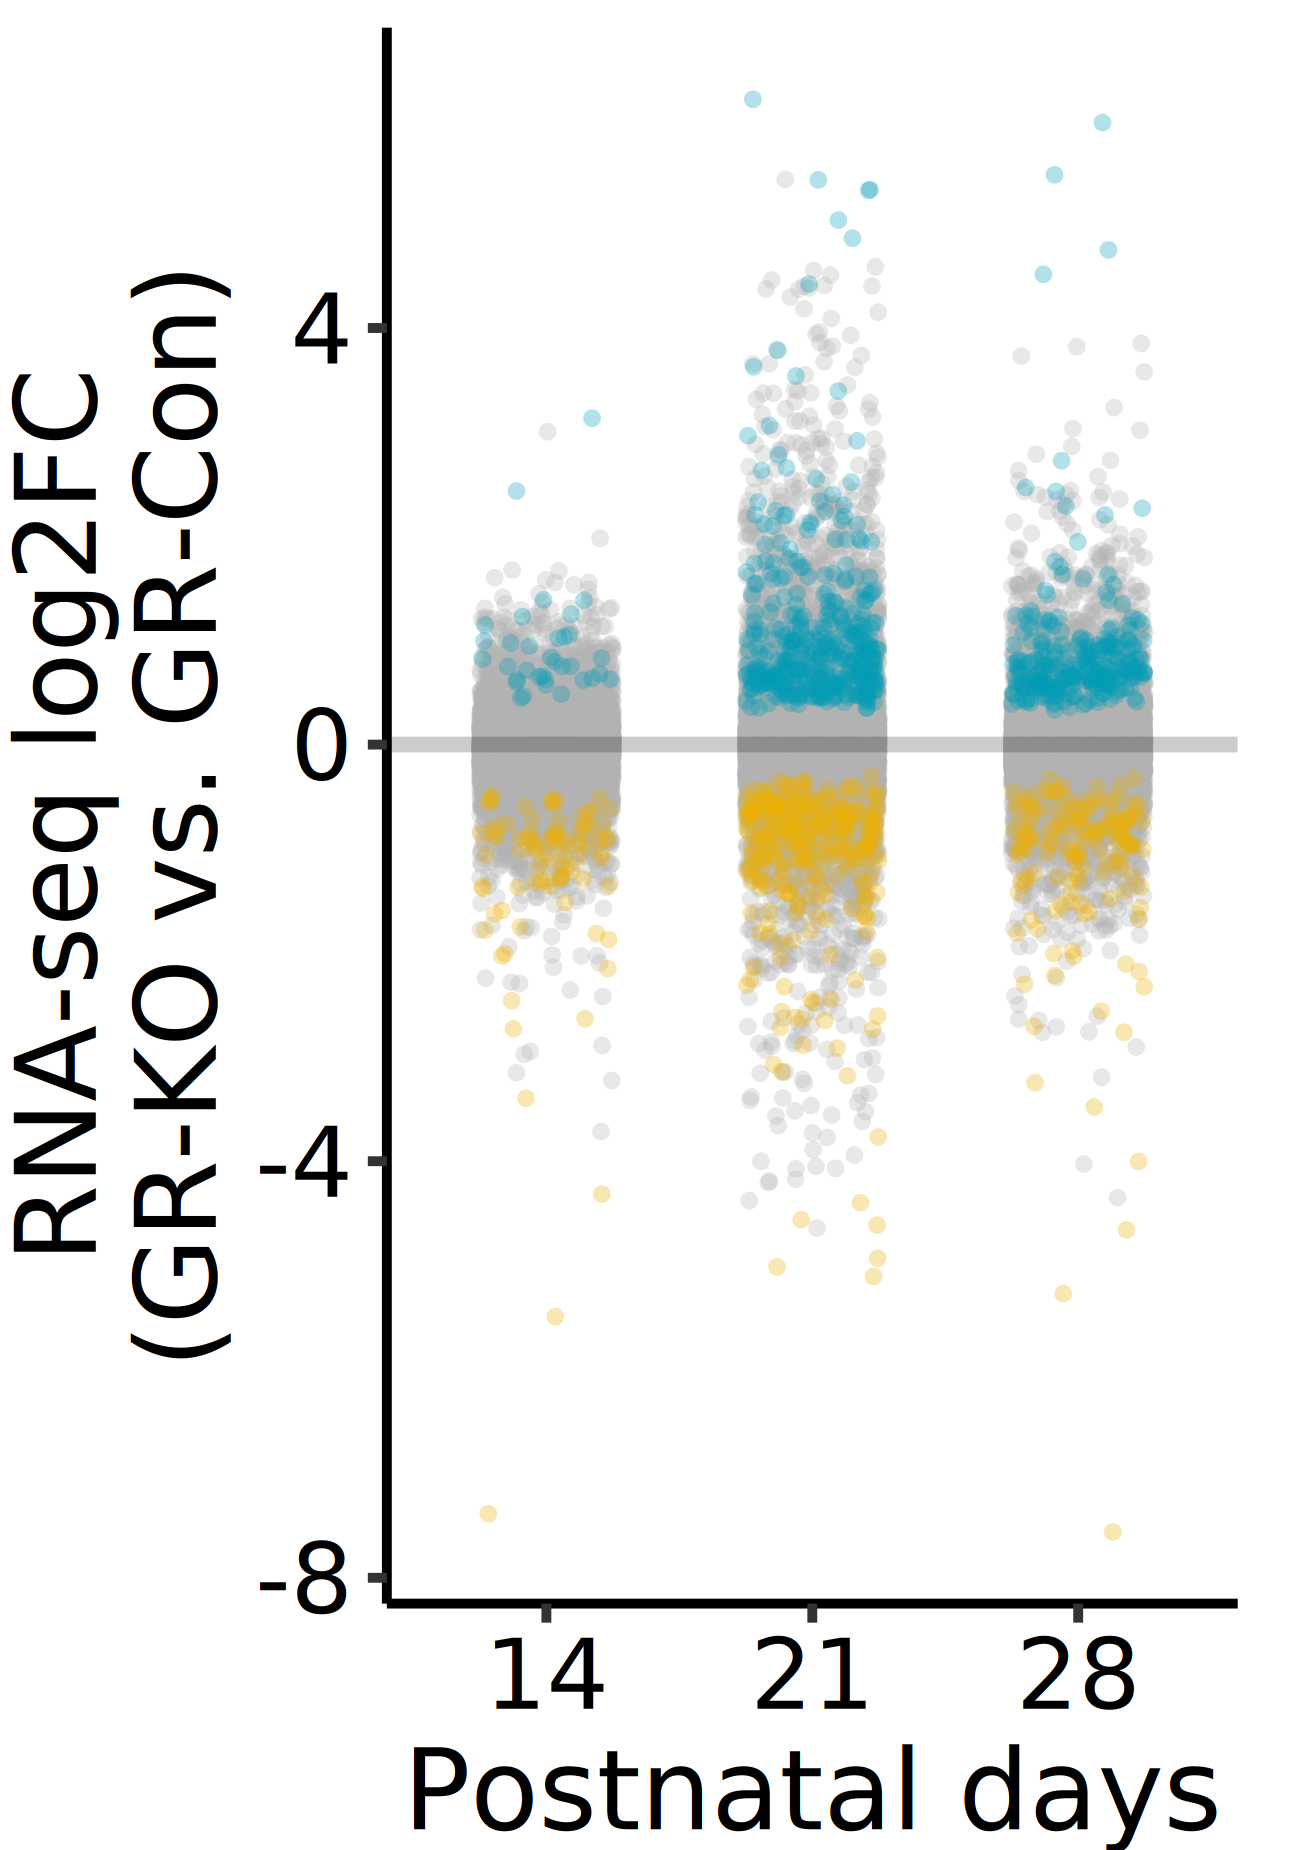

In [22]:
# Generate the plot
options(repr.plot.width=2.6, repr.plot.height=3.7,repr.plot.res=500)
ggplot(GR_dep_res_list_rbind %>%
         arrange(category), aes(x=Timepoint, y=log2FoldChange, color=category)) +
  geom_jitter(size=0.8,
              shape=16,
              alpha=0.3,
              position=position_jitter(0.25)) + 
  geom_hline(yintercept=0,alpha=0.2,lwd=0.8,color='black') + 
 theme_classic() + scale_color_manual(values = c('grey70','#019CB5','#EBAE00')) + 
xlab('Postnatal days') + 
ylab('RNA-seq log2FC\n(GR-KO vs. GR-Con)') + theme(plot.margin=margin(4,9,0,2),
                                          axis.title = element_text(color='black',size=16),
                                          axis.text = element_text(color='black',size=14), legend.position = 'none')

In [23]:
# Combine results to list
GR_rear_res_list <- list(P14=P14_rear_res,
                        P21=P21_rear_res,
                        P28=P28_rear_res)

# Categorize genes based on FC & FDR
GR_rear_res_list <- lapply(GR_rear_res_list, function(x) {
    x$category <- ifelse((x$log2FoldChange > 0) & (x$padj < 0.05), 'Up',
           ifelse((x$log2FoldChange < 0) & (x$padj < 0.05), 'Down', 'ns'))
    return(x)
})

# Add a new column with the name of the list element
GR_rear_res_list <- lapply(names(GR_rear_res_list), function(x) {
  df <- GR_rear_res_list[[x]]
  df$Timepoint <- sub('P', '', x)
  return(df)
})

GR_rear_res_list <- lapply(GR_rear_res_list, function(x) {
   x$gene <- rownames(x)
   return(x)
})

# Merge to dataframe
GR_rear_res_list_rbind <- do.call(rbind,GR_rear_res_list)

# Set plotting order
GR_rear_res_list_rbind$category <- factor(GR_rear_res_list_rbind$category, levels = c('ns','Up','Down'))

# Set Timepoint order
GR_rear_res_list_rbind$Timepoint <- factor(GR_rear_res_list_rbind$Timepoint, levels = c('14',
                                                                                    '21',
                                                                                    '28'))

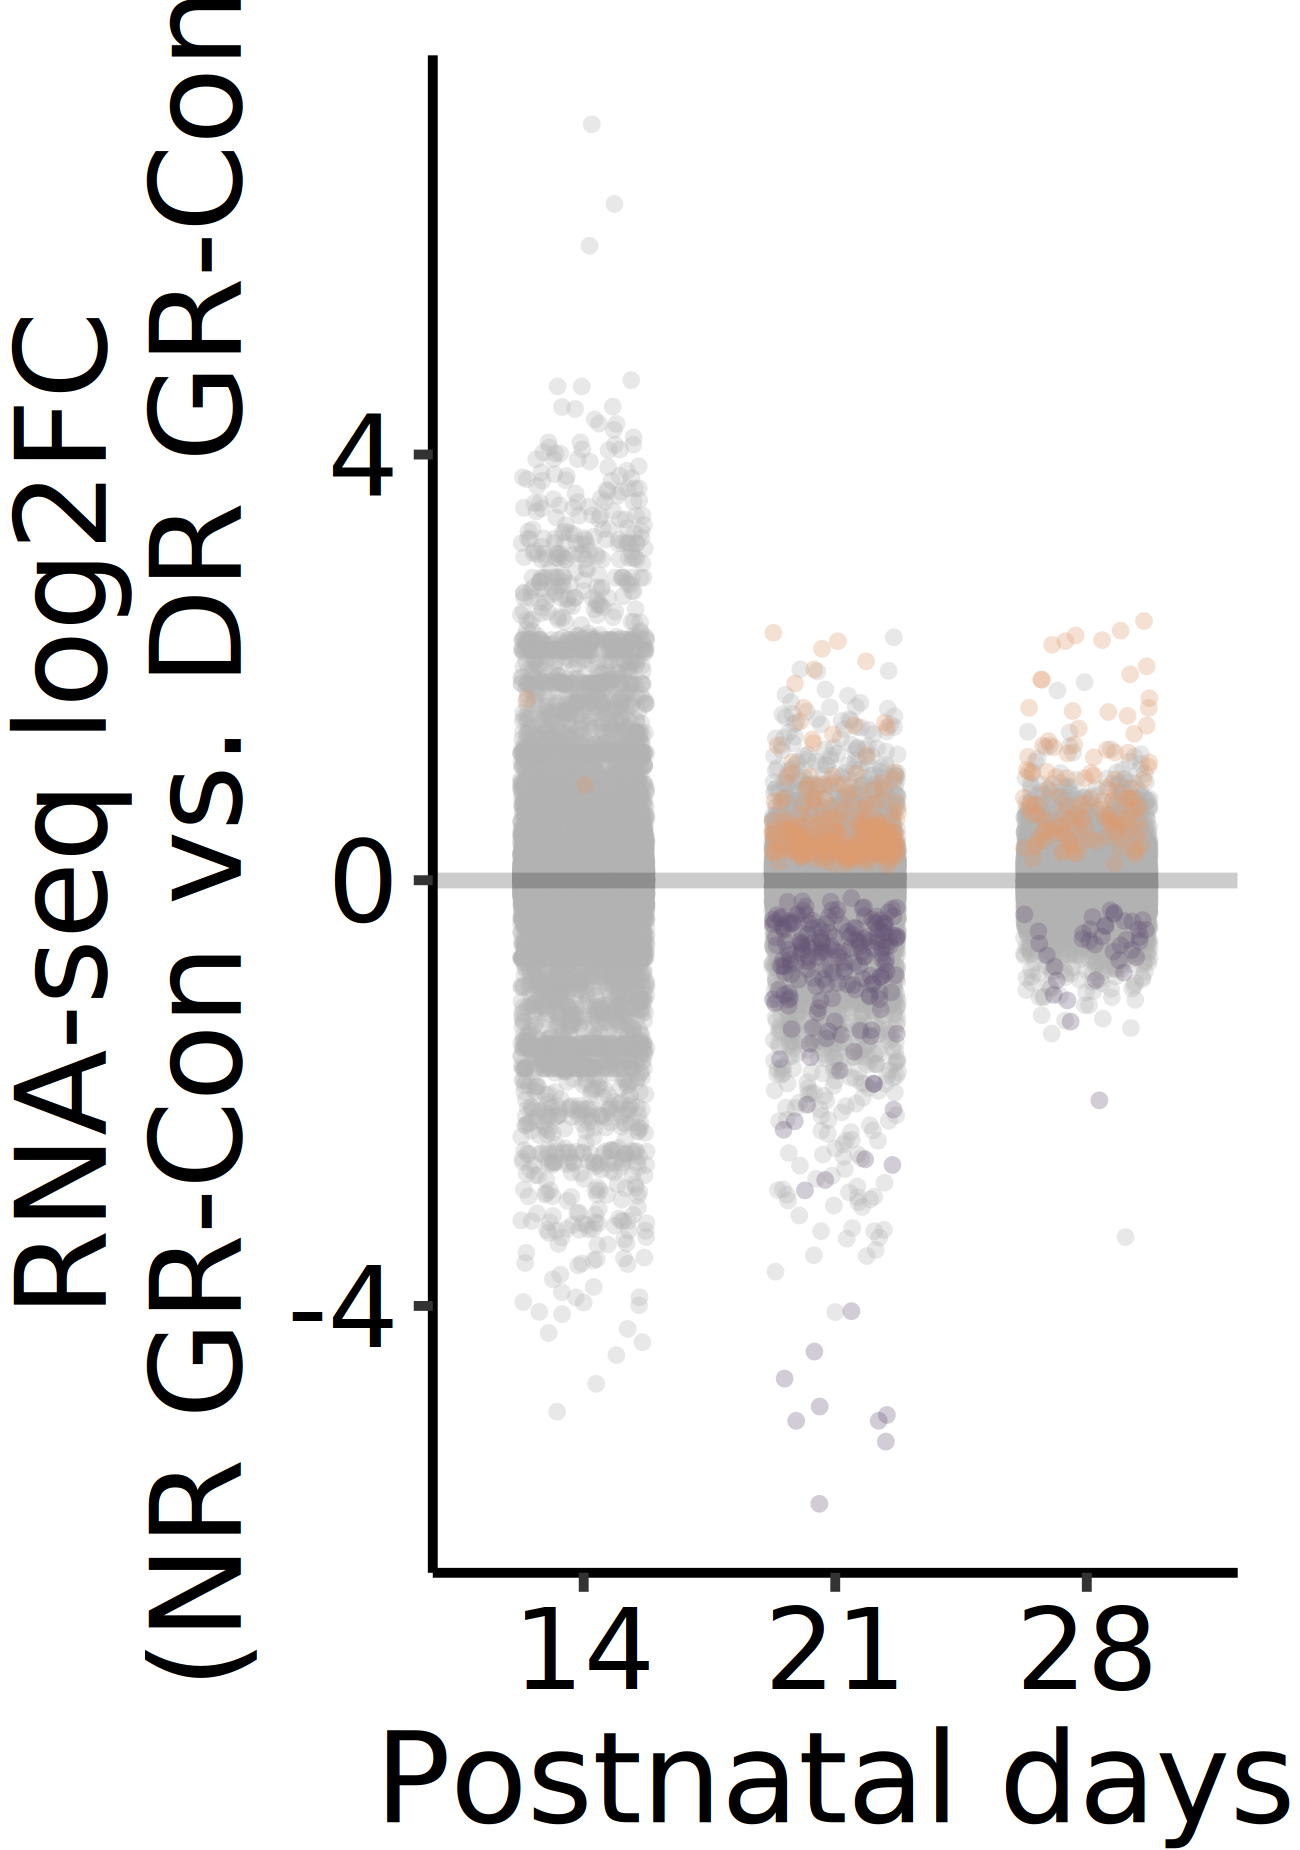

In [24]:
# Generate the plot
options(repr.plot.width=2.6, repr.plot.height=3.7,repr.plot.res=500)
ggplot(GR_rear_res_list_rbind %>%
         arrange(category), aes(x=Timepoint, y=log2FoldChange, color=category)) +
  geom_jitter(size=0.8,
              shape=16,
              alpha=0.3,
              position=position_jitter(0.25)) + 
  geom_hline(yintercept=0,alpha=0.2,lwd=0.8,color='black') + 
 theme_classic() + scale_color_manual(values = c('grey70',"#DE9B71FF","#675478FF")) + 
xlab('Postnatal days') + 
ylab('RNA-seq log2FC\n(NR GR-Con vs. DR GR-Con)') + theme(plot.margin=margin(8,9,0,2),
                                          axis.title = element_text(color='black',size=18),
                                          axis.text = element_text(color='black',size=16), legend.position = 'none')

# Generate boxplots of genes of interest

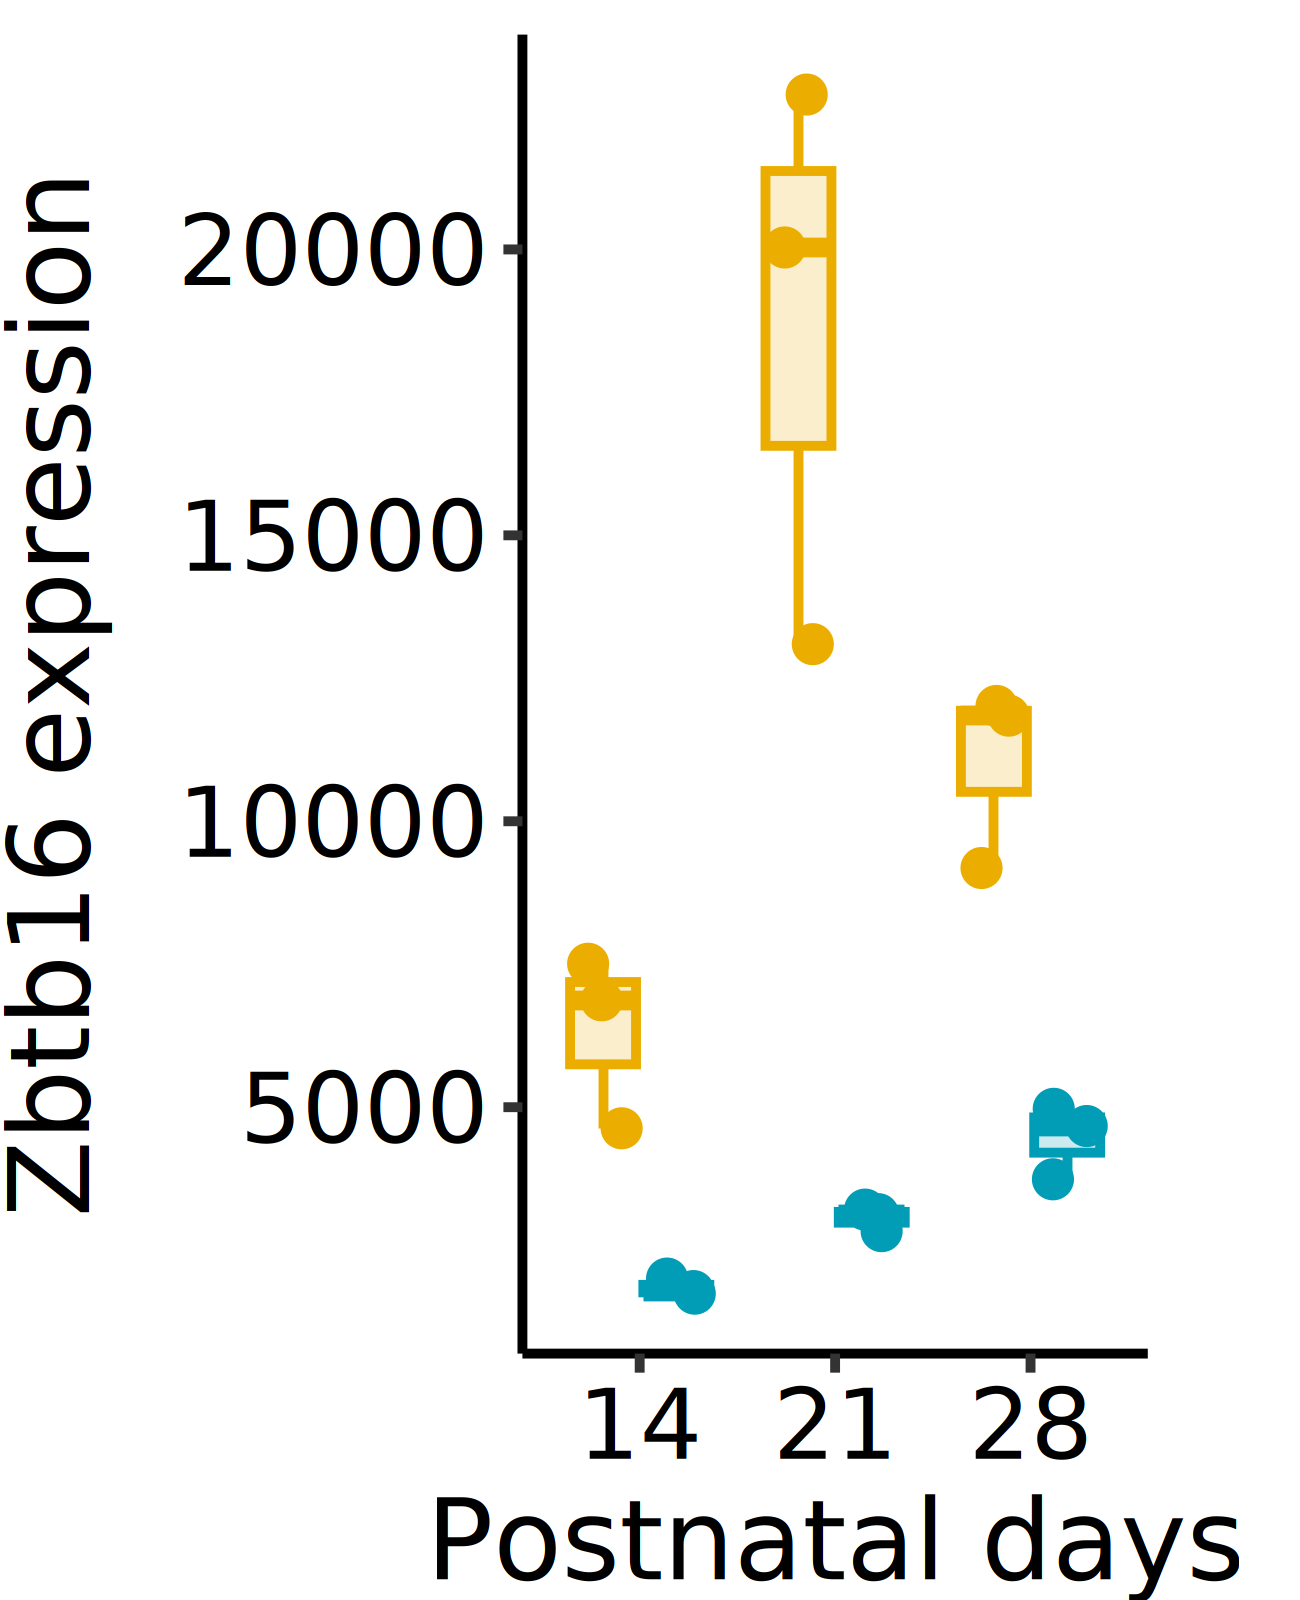

In [25]:
# Generate example plot (NR only)
options(repr.plot.width=2.6, repr.plot.height=3.2,repr.plot.res=500)
goi <- 'Zbtb16'
data <- plotCounts(tot_dds_pos[,colData(tot_dds_pos)$Rear  == 'NR'], gene = goi, intgroup = c('Timepoint','AAV'),returnData = TRUE)
data$AAV <- factor(data$AAV, levels = c('delCre','Cre'))
data$Timepoint_plotting <- substr(data$Timepoint, 2, nchar(data$Timepoint))
data$Timepoint_plotting <- factor(data$Timepoint_plotting, levels = c('14','21','28'))

ggplot(data, aes(x=Timepoint_plotting, y=count, color=AAV,fill=AAV)) + 
 geom_boxplot(alpha=0.2)+
  geom_point(size=2, shape=21,position = position_jitterdodge())  + theme_classic()  + 
theme(axis.title = element_text(size=16,color='black'),
      axis.text = element_text(size=14,color='black'),
      legend.text = element_text(size=14,color='black'),
      axis.title.y = element_text(margin = margin(0,10,0,0)),
       plot.margin=margin(5,22,0,1),
        legend.box.margin=margin(0,0,-10,-10),
     legend.position='none') + #ylim(c(0,max(data$count) * 1.1)) +
scale_color_manual(labels = c('GR-Con', 'GR-KO'), values = c('#EBAE00','#019CB5')) +
scale_fill_manual(labels = c('GR-Con', 'GR-KO'), values = c('#EBAE00','#019CB5')) +
guides(fill = "none") + labs(color="") + labs(x = 'Postnatal days', y = paste0(goi, ' expression'))

# Generate Volcano Plot of GR-regulated TFs

In [29]:
P21_GR_dep_res <- as.data.frame(na.omit(results(tot_dds_pos,lfcThreshold=0.1,altHypothesis = "greaterAbs2014",contrast=c("Group","P21_NR_Cre","P21_NR_delCre"))))

In [30]:
mouse_TF <- read.csv('/n/groups/neuroduo/Bruno/mouse_TF_list.csv',header=FALSE)

In [31]:
P21_GR_dep_res_TF_only <- P21_GR_dep_res[rownames(P21_GR_dep_res) %in% mouse_TF$V1,]

In [32]:
# Add a column of NAs
P21_GR_dep_res_TF_only$significant <- "NO"

# Set differential motifs to "experience-induced or -repressed"
P21_GR_dep_res_TF_only$significant[ (P21_GR_dep_res_TF_only$log2FoldChange > 0) & (P21_GR_dep_res_TF_only$padj < 0.05)] <- "Up"

P21_GR_dep_res_TF_only$significant[ (P21_GR_dep_res_TF_only$log2FoldChange < 0) & (P21_GR_dep_res_TF_only$padj < 0.05)] <- "Down"

P21_GR_dep_res_TF_only$significant <- factor(P21_GR_dep_res_TF_only$significant, levels = rev(c('Up','Down','NO')))

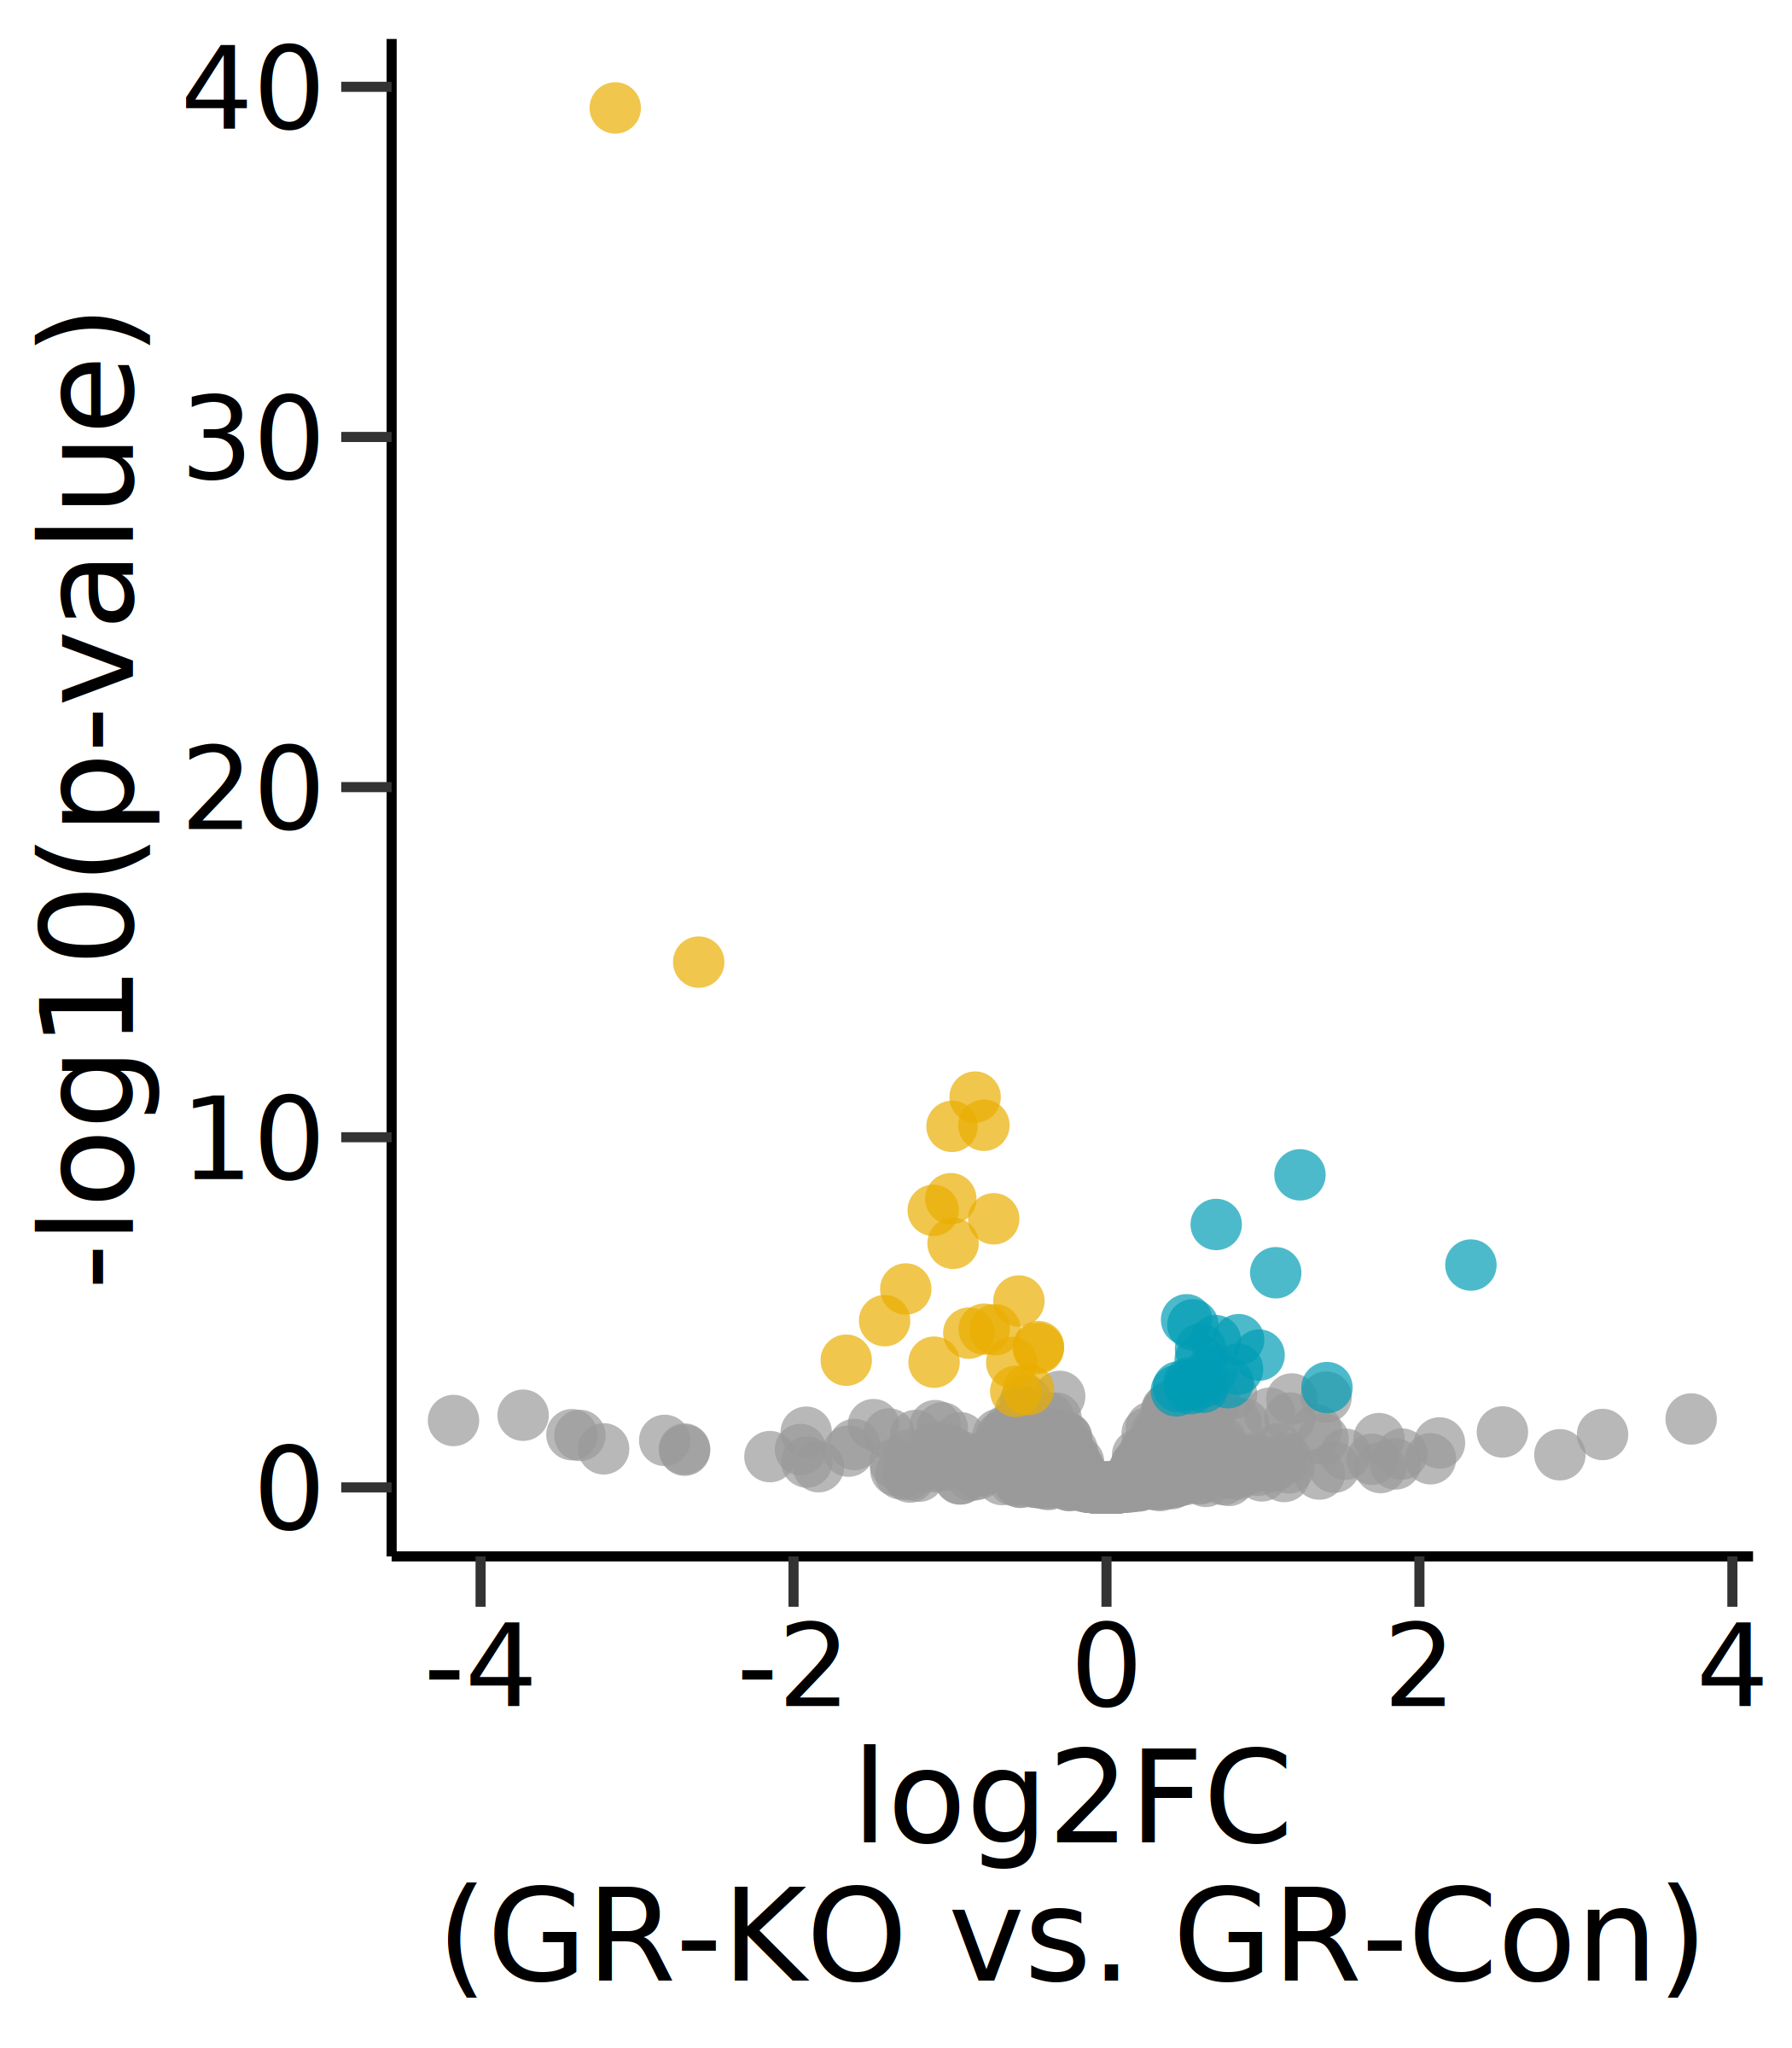

In [33]:
# Make Volcano plot
options(repr.plot.width=3.5, repr.plot.height=4,repr.plot.res=600)

p8 <- ggplot(data = P21_GR_dep_res_TF_only %>% arrange(significant), aes(x = log2FoldChange, y = -log10(pvalue), col = significant)) + 
geom_point(shape=16,alpha=0.7,size=3) + 
    theme_classic() + 
    scale_color_manual(values = c( "grey60", "#EAAE00","#009CB5")) +
    theme(axis.text = element_text(size = 16, color = 'black'),
          axis.title = element_text(size = 18),
          axis.ticks.length=unit(.25, "cm"),
          plot.title = element_text(size = 20, hjust = 0.5),
          legend.position = 'None') +
    xlab('log2FC\n(GR-KO vs. GR-Con)') +
    ylab('-log10(p-value)')
p8

# Generate expression line plots of GR- and experience-dependent genes

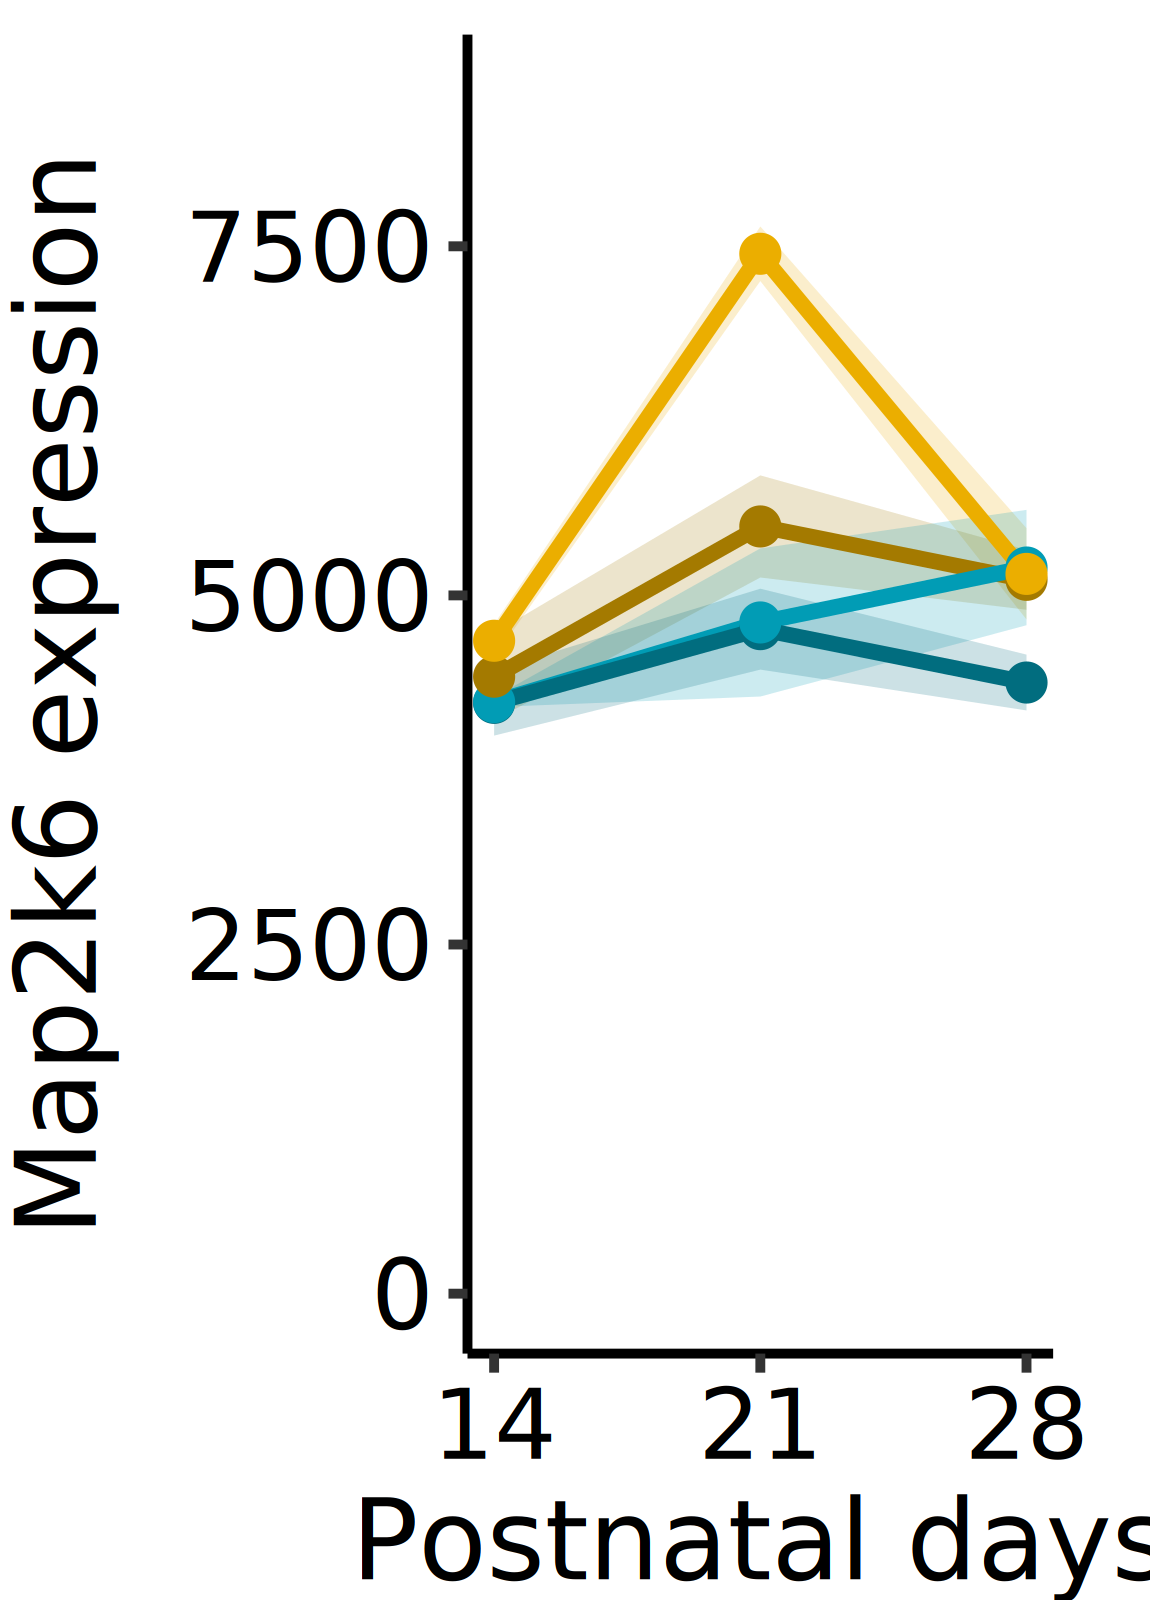

In [34]:
# Prepare data
goi <- 'Map2k6'
data <- plotCounts(tot_dds_pos, gene = goi, intgroup = c('Timepoint','AAV','Rear'),returnData = TRUE)
data_df <- summarySE(data, measurevar="count", groupvars=c("AAV","Rear","Timepoint"))
data_df$Timepoint_plotting <- as.numeric(gsub('P','',data_df$Timepoint))
data_df$Group <- paste0(data_df$Rear,'_',data_df$AAV)
data_df$Group <- factor(data_df$Group, levels = c('NR_delCre',
                                                 'DR_delCre',
                                                 'NR_Cre',
                                                 'DR_Cre'))

# Generate the plot
options(repr.plot.width=2.3, repr.plot.height=3.2,repr.plot.res=500)

p <- ggplot(data_df, aes(x=Timepoint_plotting, y=count, group=Group, color=Group)) + 
    geom_ribbon(aes(x=as.numeric(Timepoint_plotting),ymax = count + se, ymin = count - se, fill = Group),
              alpha = 0.2,
              linetype=0) + 
    geom_line(aes(group=Group),linewidth=.8) +
    geom_point(shape=19,size=2) + theme_classic()+
    ylim(c(0,max(data$count) * 1.1)) + labs(x = 'Postnatal days', y = paste0(goi,' expression')) +
    scale_color_manual(labels = c('NR-GR WT',
                                  'DR-GR WT',
                                  'NR-GR KO',
                                  'DR-GR KO'), values = c('#EBAE00',
                                                              darken('#EBAE00',0.3,space = "HLS"),
                                                             '#019CB5',
                                                          darken('#019CB5',0.3,space = "HLS"))) +
    scale_fill_manual(labels = c('NR-GR WT',
                                  'DR-GR WT',
                                  'NR-GR KO',
                                  'DR-GR KO'), values = c('#EBAE00',
                                                           darken('#EBAE00',0.3,space = "HLS"),
                                                          '#019CB5',
                                                          darken('#019CB5',0.3,space = "HLS"))) + guides(fill = "none") + labs(color="") +
scale_x_continuous(breaks=c(14,21,28)) + 
theme(axis.title = element_text(size=16,color='black'),
      axis.text = element_text(size=14,color='black'),
      legend.text = element_text(size=14,color='black'),
      axis.title.y = element_text(margin = margin(0,10,0,0)),
       plot.margin=margin(5,14,0,2),
     legend.position='none')

p

# Eulerr overlap b/w GR- and experience-dependent genes

In [35]:
P21_GR_dep_res_relax <- as.data.frame(na.omit(results(tot_dds_pos,contrast=c("Group","P21_NR_Cre","P21_NR_delCre"))))

In [36]:
# P21 exp-dep genes
table(rownames(P21_rear_res[P21_rear_res$padj < 0.05,]) %in% 
    rownames(P21_GR_dep_res_relax[P21_GR_dep_res_relax$padj < 0.05,]))


FALSE  TRUE 
  350   111 

In [37]:
# P21 exp-dep genes
table(rownames(P21_GR_dep_res_relax[P21_GR_dep_res_relax$padj < 0.05,]) %in% 
    rownames(P21_rear_res[P21_rear_res$padj < 0.05,]))


FALSE  TRUE 
 1327   111 

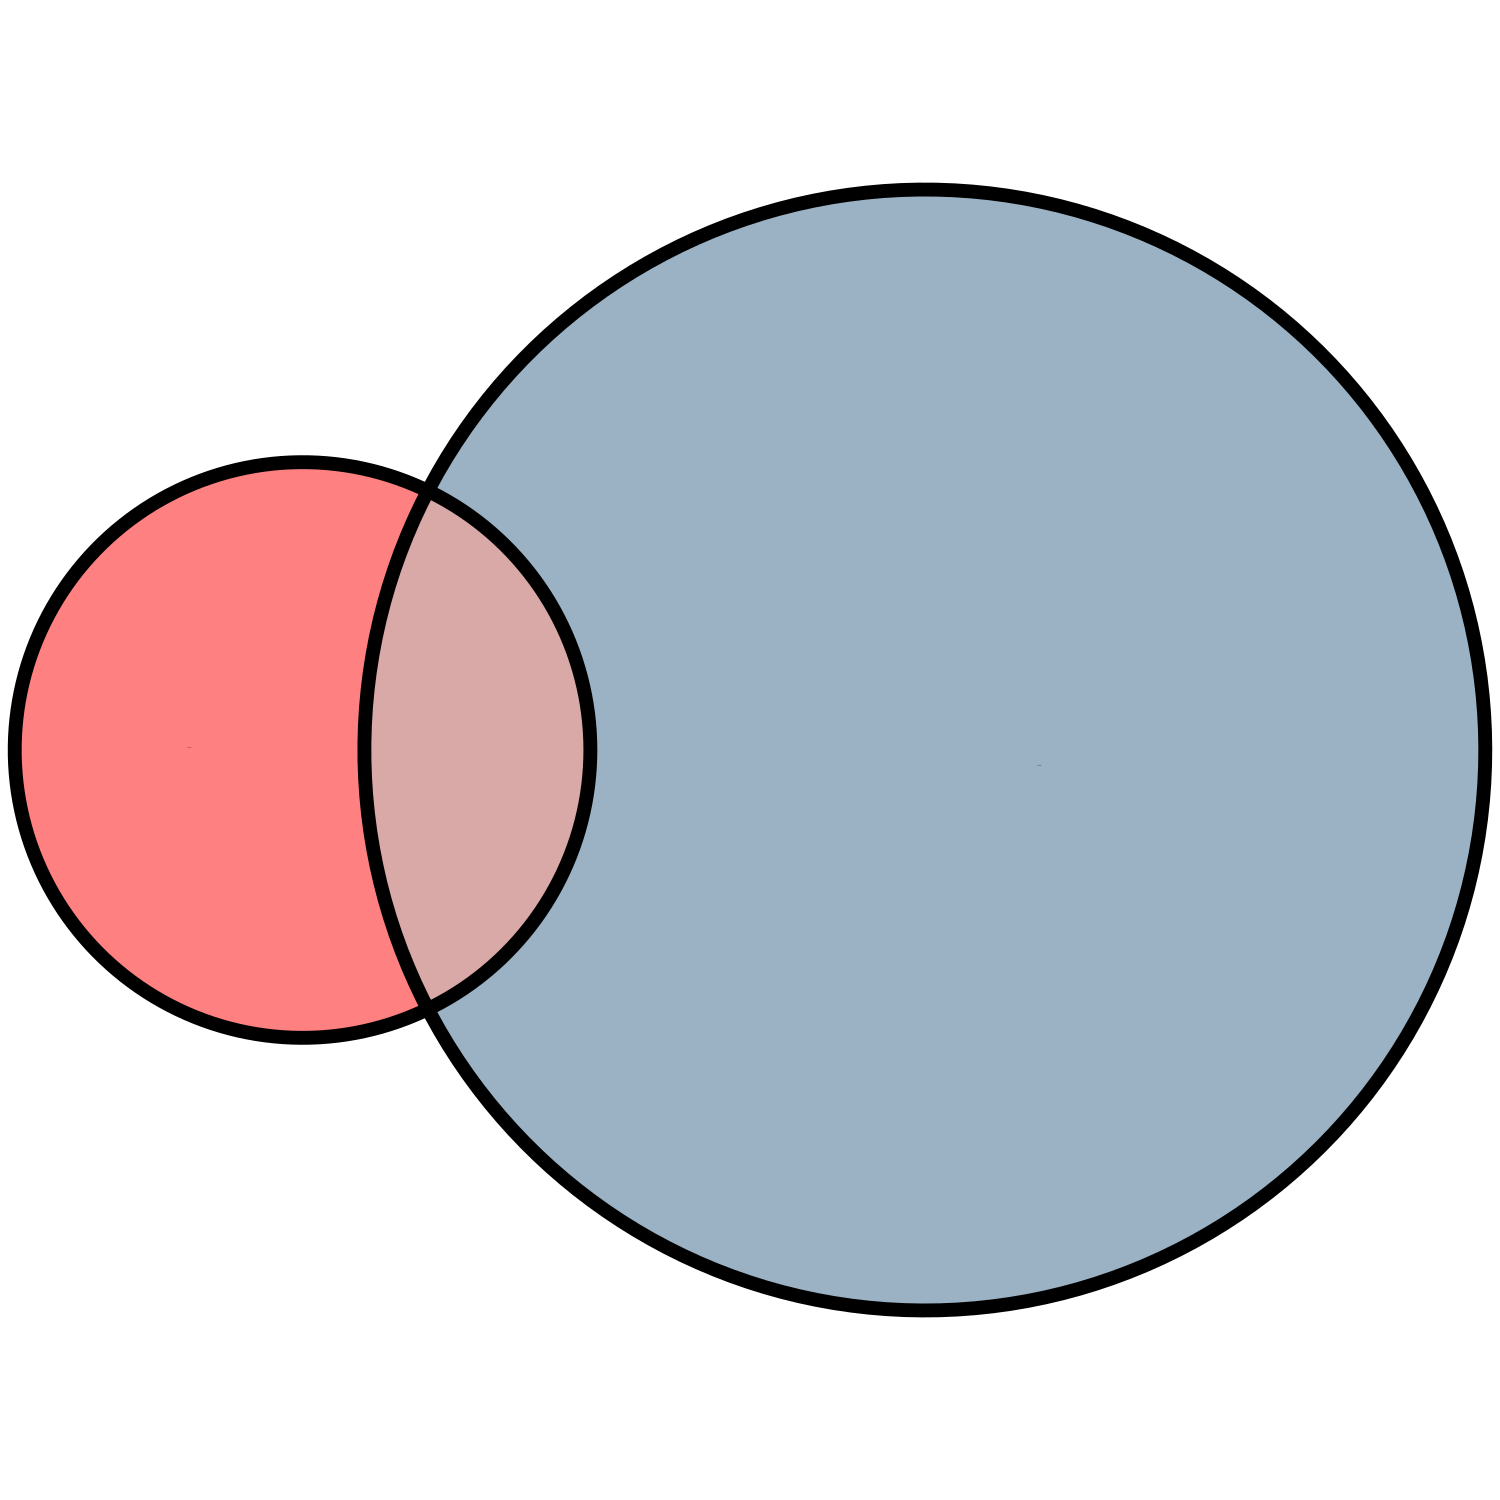

In [38]:
# Generate plot
DEG_overlap <- c(
  'Exp-dep' = 350-111,
  'GR-dep' = 1327-111,
  "Exp-dep&GR-dep" =111
)

options(repr.plot.width=3, repr.plot.height=3,repr.plot.res=500)
fit3 <- euler(DEG_overlap, shape = "ellipse")
plot(fit3,
     lwd=2,
    fills = list(fill = c("red", "steelblue4"), alpha = 0.5),
     labels = list(col = "black", fontsize = 0))

# Correlation analysis of GR-dependent and developmental gene log2FC values

In [39]:
# Calculate maturation gene signature
mature_res <- na.omit(results(tot_dds_pos,contrast=c("Group","P21_NR_delCre","P14_NR_delCre"),lfcThreshold = 0.3,altHypothesis = "greaterAbs2014"))

In [40]:
# DESeq2 results
P21_GR_dep_res <- as.data.frame(na.omit(results(tot_dds_pos,lfcThreshold=0.1,altHypothesis = "greaterAbs2014",contrast=c("Group","P21_NR_delCre","P21_NR_Cre"))))
P21_GR_dep_res_relax <- as.data.frame(na.omit(results(tot_dds_pos,contrast=c("Group","P21_NR_delCre","P21_NR_Cre"))))

In [384]:
# Write P21_GR_dep_res for astrocyte snRNA atlas comparison
saveRDS(P21_GR_dep_res, '/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res.rds')
saveRDS(P21_GR_dep_res_relax, '/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res_relax.rds')

In [28]:
# Write P21_GR_dep_res for astrocyte snRNA atlas comparison
P21_GR_dep_res <- readRDS('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res.rds')
P21_GR_dep_res_relax <- readRDS('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res_relax.rds')

In [10]:
write.csv(P21_GR_dep_res,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res.csv')
write.csv(P21_GR_dep_res_relax,'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res_relax.csv')

In [43]:
write.csv(data.frame(GR_dep_P28_res[GR_dep_P28_res$padj < 0.05,]),
          '/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/GR_KO_P28_DEGs.csv')
write.csv(data.frame(GR_dep_P21_res[GR_dep_P21_res$padj < 0.05,]),
          '/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/GR_KO_P21_DEGs.csv')

In [46]:
write.csv(data.frame(GR_dep_P28_res_lfc),
          '/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/GR_KO_P28_lfc_DEGs.csv')
write.csv(data.frame(GR_dep_P21_res_lfc),
          '/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/GR_KO_P21_lfc_DEGs.csv')

In [ ]:
write.csv(data.frame(mature_res[order(mature_res$padj),]),'/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/mature_res_DEGs.csv')

In [41]:
# Collect significant maturation DEGs
mature_res_df <- data.frame(mature_res[mature_res$padj < 0.05,])

# Collect GR-dependent genes
P21_GR_dep_res_df <- data.frame(P21_GR_dep_res)

# Combine
combine_FC_df <- data.frame(gene = rownames(mature_res_df),
                            x = mature_res_df$log2FoldChange,
                            y = P21_GR_dep_res_df[rownames(mature_res_df),]$log2FoldChange)

# Process data
rownames(combine_FC_df) <- combine_FC_df$gene
combine_FC_df <- combine_FC_df[,-1]
combine_FC_df$direction <- ifelse(combine_FC_df$x > 0, 'Pos', 'Neg')

In [42]:
get_density <- function(x, y, ...) {
  dens <- MASS::kde2d(x, y, ...)
  ix <- findInterval(x, dens$x)
  iy <- findInterval(y, dens$y)
  ii <- cbind(ix, iy)
  return(dens$z[ii])
}

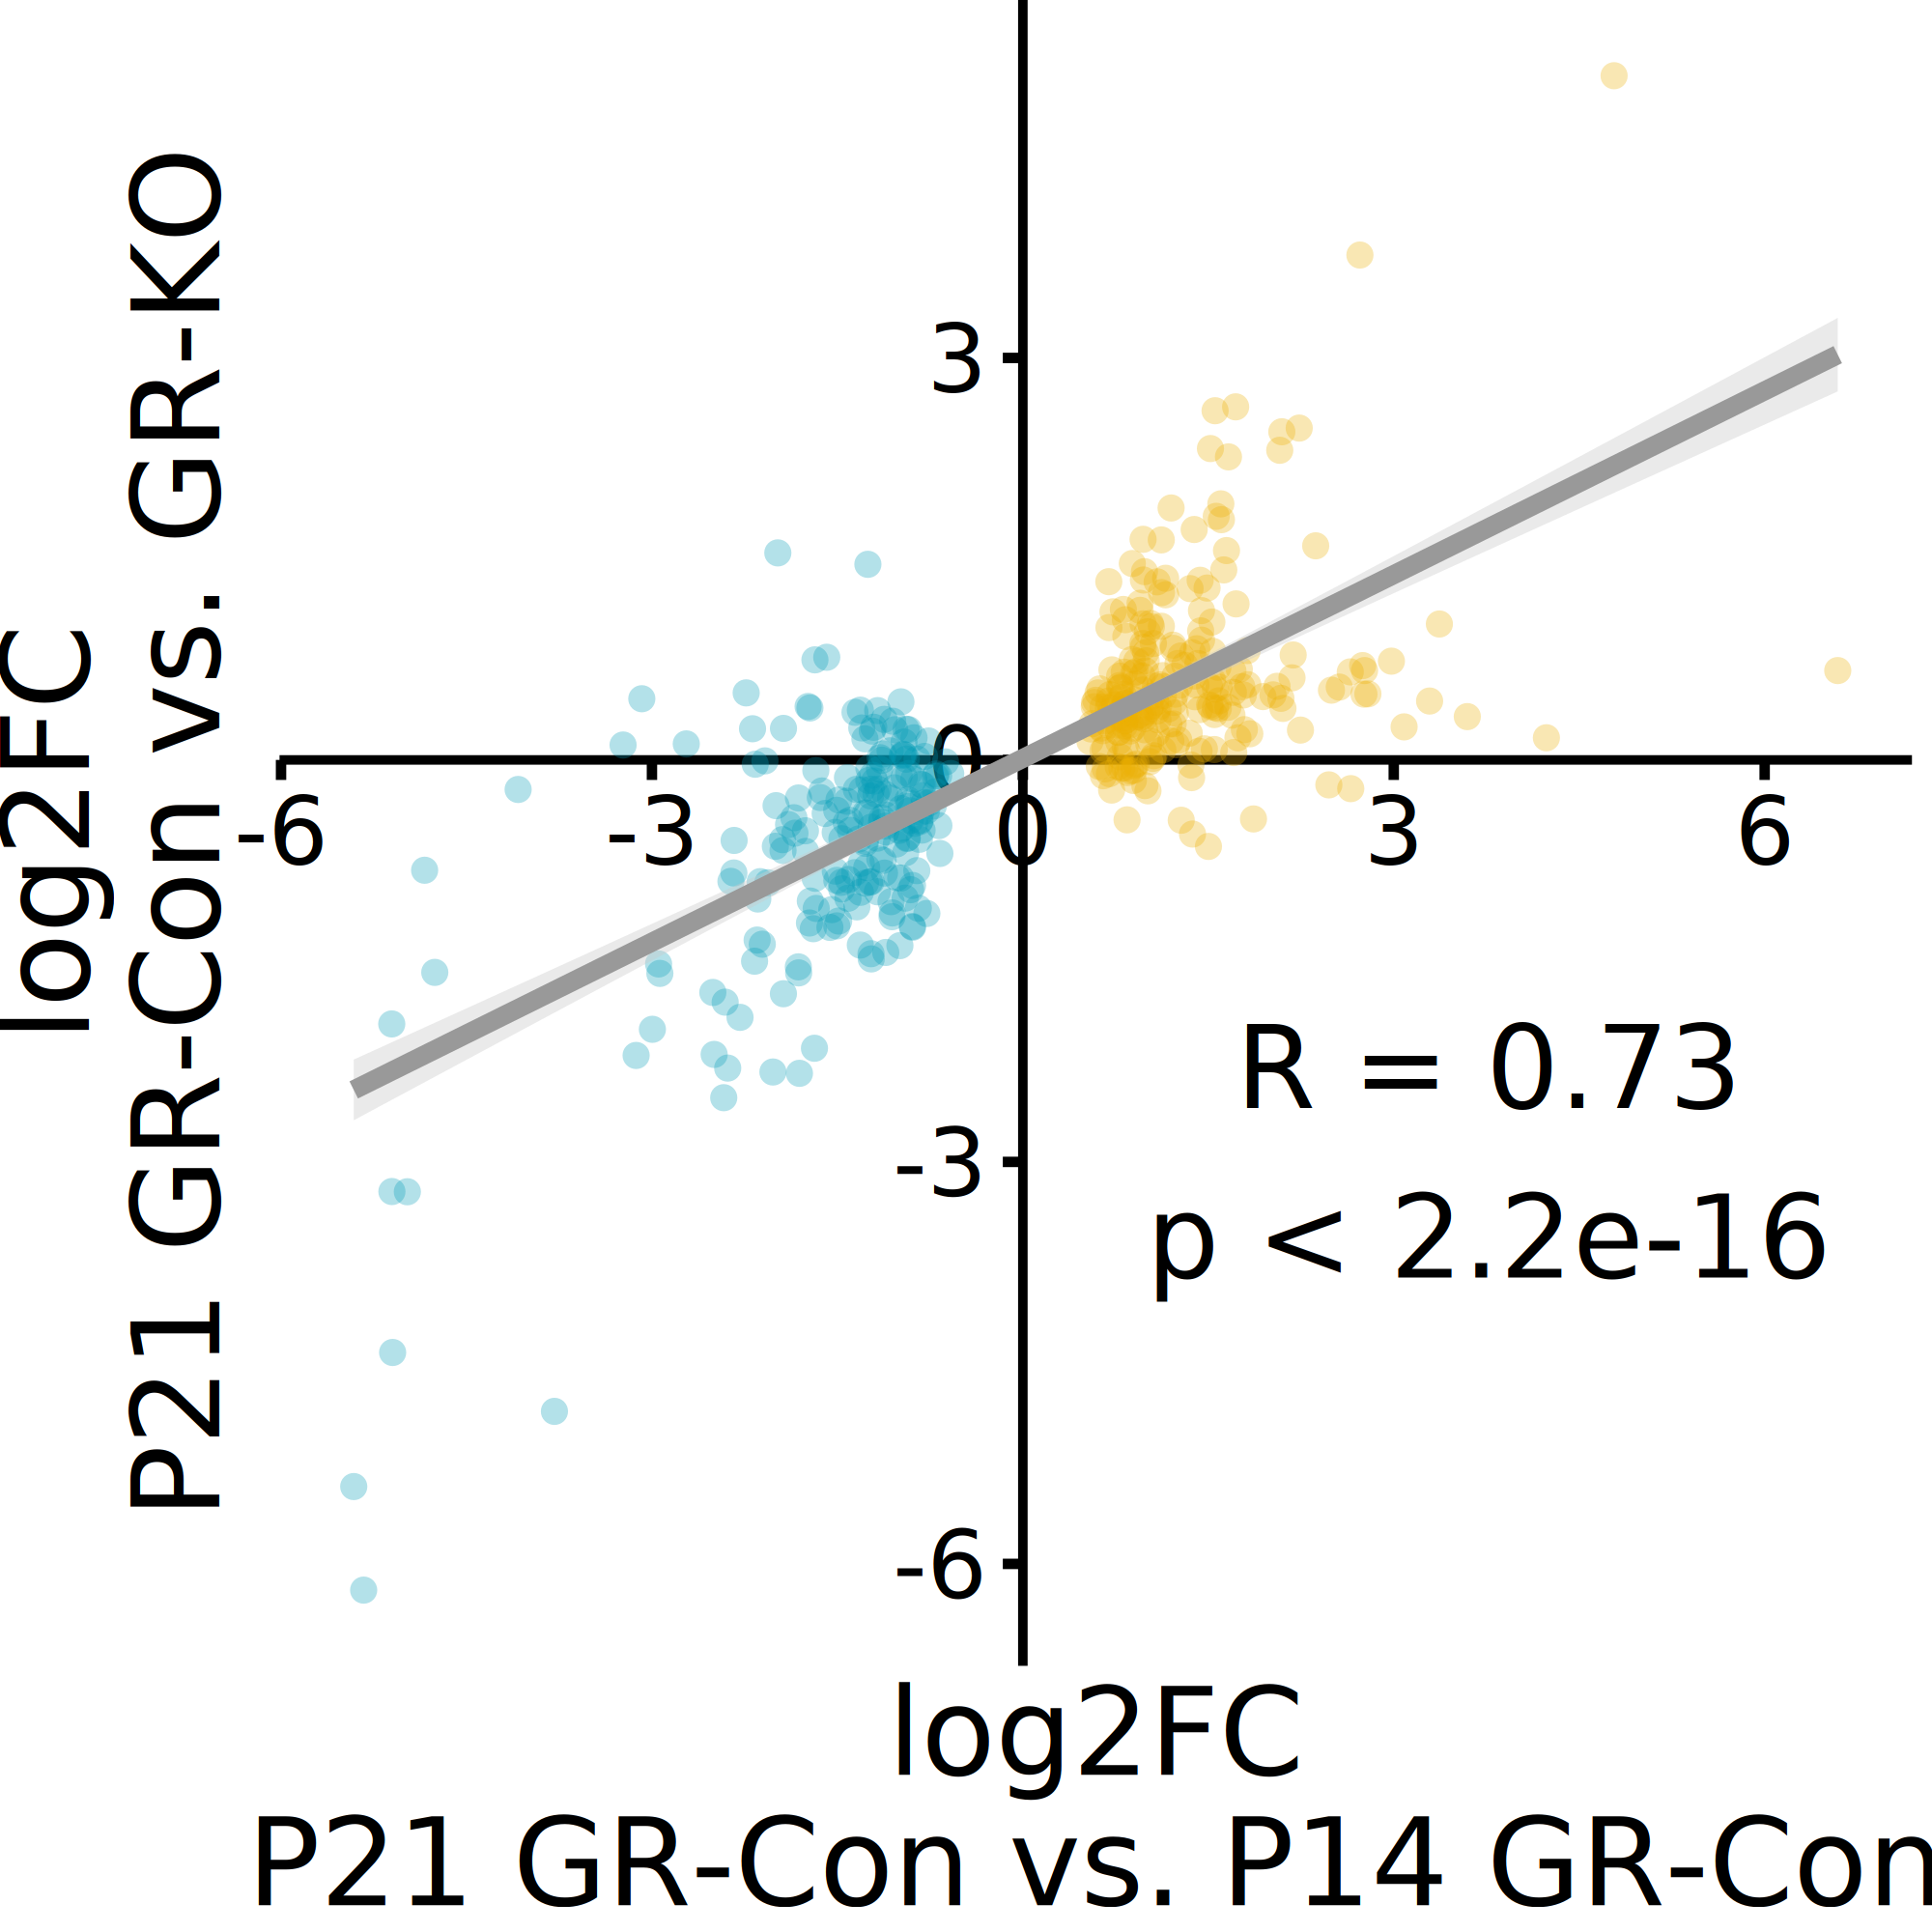

In [43]:
# Generate plot
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=500)

ggscatter(combine_FC_df, x = "x", y = "y", color = "direction",alpha=0.3,size=1.5,shape=16,
          add = "reg.line", add.params = list(color = "grey60", fill = "grey80",linetype='solid'), conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",cor.coeff.args = list(size=6,label.x = 1,label.y = -3, label.sep = "\n"),
          ylab = "log2FC\nP21 GR-Con vs. GR-KO", xlab = "log2FC\nP21 GR-Con vs. P14 GR-Con") + coord_axes_inside(labels_inside = TRUE) + 
        scale_color_manual(values = c('#019CB5','#EBAE00')) + theme(legend.position='none',
                                                                    axis.text = element_text(size=14),
                                                                    plot.margin = margin(0,3,0,0),
                                                                    axis.title = element_text(size=18),
                                                                    axis.title.y = element_text(margin=margin(0,5,0,0)))

# Identifying experience- and GR-dependent gene programs w/LRT + k-means & generate heatmap for Fig. 3

In [44]:
# Normalize data
ntd <- normTransform(tot_dds_pos)

In [45]:
# Combine into dataframe
df <- data.frame(P14_DR_Cre = rowMeans(assay(ntd)[,c(1,2,3)]),
                 P14_DR_delCre = rowMeans(assay(ntd)[,c(4,5,6)]),
                 P14_NR_Cre = rowMeans(assay(ntd)[,c(7,8,9)]),
                 P14_NR_delCre = rowMeans(assay(ntd)[,c(10,11,12)]),
                 P21_DR_Cre = rowMeans(assay(ntd)[,c(13,14,15,16)]),
                 P21_DR_delCre = rowMeans(assay(ntd)[,c(17,18,19,20)]),
                 P21_NR_Cre = rowMeans(assay(ntd)[,c(21,22,23)]),
                 P21_NR_delCre = rowMeans(assay(ntd)[,c(24,25,26)]),
                 P28_DR_Cre = rowMeans(assay(ntd)[,c(27,28,29,30)]),
                 P28_DR_delCre = rowMeans(assay(ntd)[,c(31,32,33,34)]),
                 P28_NR_Cre = rowMeans(assay(ntd)[,c(35,36,37)]),
                 P28_NR_delCre = rowMeans(assay(ntd)[,c(38,39,40)]))

In [46]:
# Calculate maturation gene signature
mature_res <- na.omit(results(tot_dds_pos,contrast=c("Group","P21_NR_delCre","P14_NR_delCre"),lfcThreshold = 0.3,altHypothesis = "greaterAbs2014"))
mature_res_df <- data.frame(mature_res[mature_res$padj < 0.05,])

In [47]:
# scale rows
df_scale <- t(scale(t(df[rownames(mature_res_df),])))
# compute distance metric
dist_mat <- dist(df_scale, method = 'euclidean')
# run hclust
hclust_complete <- hclust(dist_mat, method = 'ward.D2')
# run cutree
cut_avg <- cutree(hclust_complete, k = 4)

In [48]:
cut_avg_relabel <- ifelse(cut_avg==1,3,
                          ifelse(cut_avg==2,4,
                                ifelse(cut_avg==3,2,
                                       1)))

In [49]:
rowsplit <- data.frame(c(rep('1',table(cut_avg_relabel)[[1]]),
                         rep('2',table(cut_avg_relabel)[[2]]),
                         rep('3',table(cut_avg_relabel)[[3]]),
                         rep('4',table(cut_avg_relabel)[[4]])))
colsplit <- data.frame(c(rep('GR-Con',3),
                         rep('GR-KO',3)))

library(circlize)
library(RColorBrewer)
col_fun = colorRamp2(c(-1.75, 0, 1.75), c("#0055FFFF", "#FFFFCCFF", "#FF5500FF"))

df_reorder <- df[,c(1,3,2,4,5,7,6,8,9,11,10,12)]

df_reorder <- df[,c(4,8,12,3,7,11)]
names(df_reorder) <- rep(c('P14','P21','P28'),2)

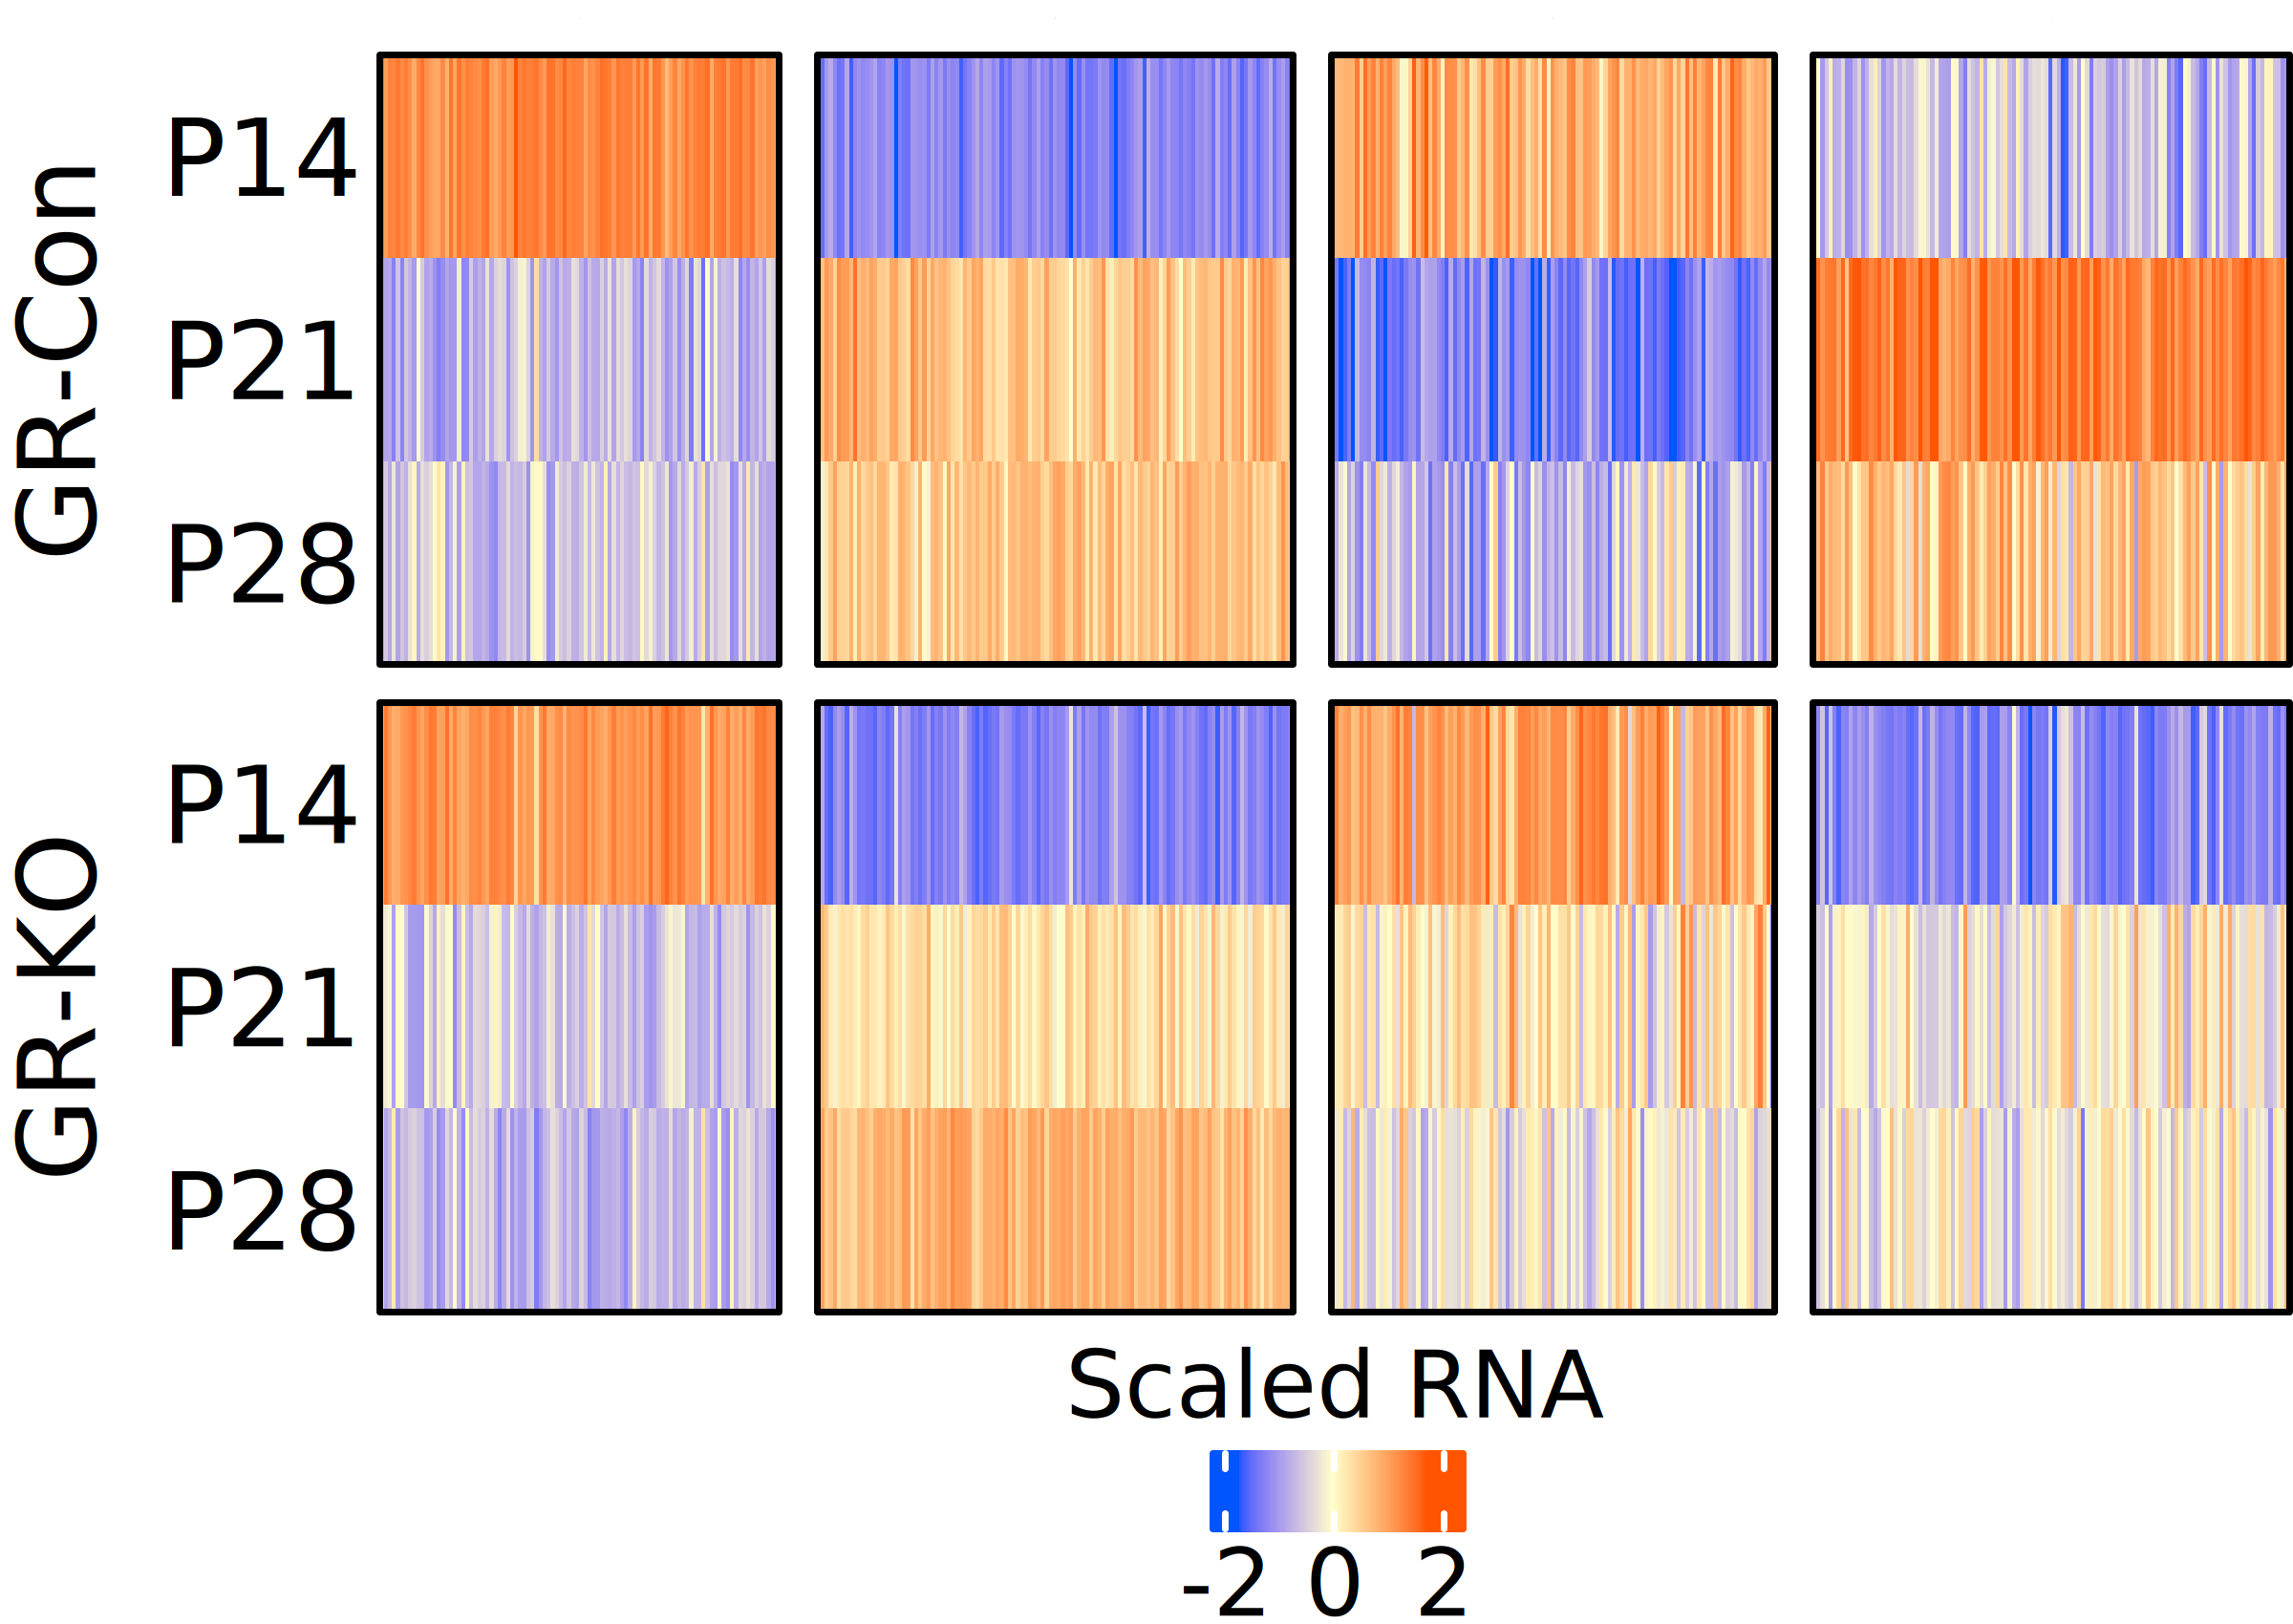

In [50]:
# Generate heatmap
options(repr.plot.width=4.8, repr.plot.height=3.4,repr.plot.res=500)

ht1 <- Heatmap(scale(t(df_reorder[names(cut_avg_relabel[order(cut_avg_relabel)]),])),
        cluster_rows = FALSE,
        cluster_columns=FALSE,
        show_row_names=TRUE,
        row_names_side = 'left',
        show_column_names=FALSE,
        row_names_gp = gpar(fontsize = 16),
        row_title_gp = gpar(fontsize = 16),
        column_title_gp = gpar(fontsize = 0),
        name = "Scaled RNA",
        row_split = colsplit,
        row_gap = unit(2, "mm"), 
        column_gap = unit(2, "mm"),
        column_split = rowsplit,
        heatmap_legend_param = list(legend_direction = "horizontal", 
                                    legend_width = unit(1.3, "cm"),
                                    labels = c('-2','0','2'),
                                     at = c(-2,0,2),
                                     labels_gp = gpar(fontsize = 14),
                                    title_gp = gpar(fontsize = 14),
                                    title_position = "topcenter"),
        col = col_fun,
              border=TRUE)

draw(ht1, heatmap_legend_side = "bottom",padding = unit(c(0.5, 1, 1, 0.2), "mm"))


# GO analysis of astrocyte maturation gene clusters

In [291]:
write.csv(names(cut_avg[cut_avg==1]),'clus1_DEG.csv')
write.csv(names(cut_avg[cut_avg==2]),'clus2_DEG.csv')
write.csv(names(cut_avg[cut_avg==3]),'clus3_DEG.csv')
write.csv(names(cut_avg[cut_avg==4]),'clus4_DEG.csv')

In [51]:
c1 <- names(cut_avg[cut_avg==1])
c2 <- names(cut_avg[cut_avg==2])
c3 <- names(cut_avg[cut_avg==3])
c4 <- names(cut_avg[cut_avg==4])

In [53]:
c1_entrez <- AnnotationDbi::select(org.Mm.eg.db, 
       keys = c1,
       columns = c("ENTREZID", "SYMBOL"),
       keytype = "SYMBOL")

c2_entrez <- AnnotationDbi::select(org.Mm.eg.db, 
       keys = c2,
       columns = c("ENTREZID", "SYMBOL"),
       keytype = "SYMBOL")

c3_entrez <- AnnotationDbi::select(org.Mm.eg.db, 
       keys = c3,
       columns = c("ENTREZID", "SYMBOL"),
       keytype = "SYMBOL")

c4_entrez <- AnnotationDbi::select(org.Mm.eg.db, 
       keys = c4,
       columns = c("ENTREZID", "SYMBOL"),
       keytype = "SYMBOL")

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [54]:
# Run enrichGO
c1_c2_ego <- enrichGO(gene          = c(c1_entrez$ENTREZID,c2_entrez$ENTREZID),
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
        readable      = TRUE)

In [55]:
# Run enrichGO
c3_c4_ego <- enrichGO(gene          = c(c3_entrez$ENTREZID,c4_entrez$ENTREZID),
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
        readable      = TRUE)

In [56]:
# Add line breaks for plotting
c1_c2_ego@result$Description <- gsub('response to toxic substance',
                                     'response to\ntoxic substance',
                                     c1_c2_ego@result$Description)
c1_c2_ego@result$Description <- gsub('cell-substrate adhesion',
                                     'cell-substrate\nadhesion',
                                     c1_c2_ego@result$Description)
c1_c2_ego@result$Description <- gsub('extracellular structure organization',
                                     'extracellular\nstructure organization',
                                     c1_c2_ego@result$Description)
c1_c2_ego@result$Description <- gsub('external encapsulating structure organization',
                                     'external encapsulating\nstructure organization',
                                     c1_c2_ego@result$Description)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


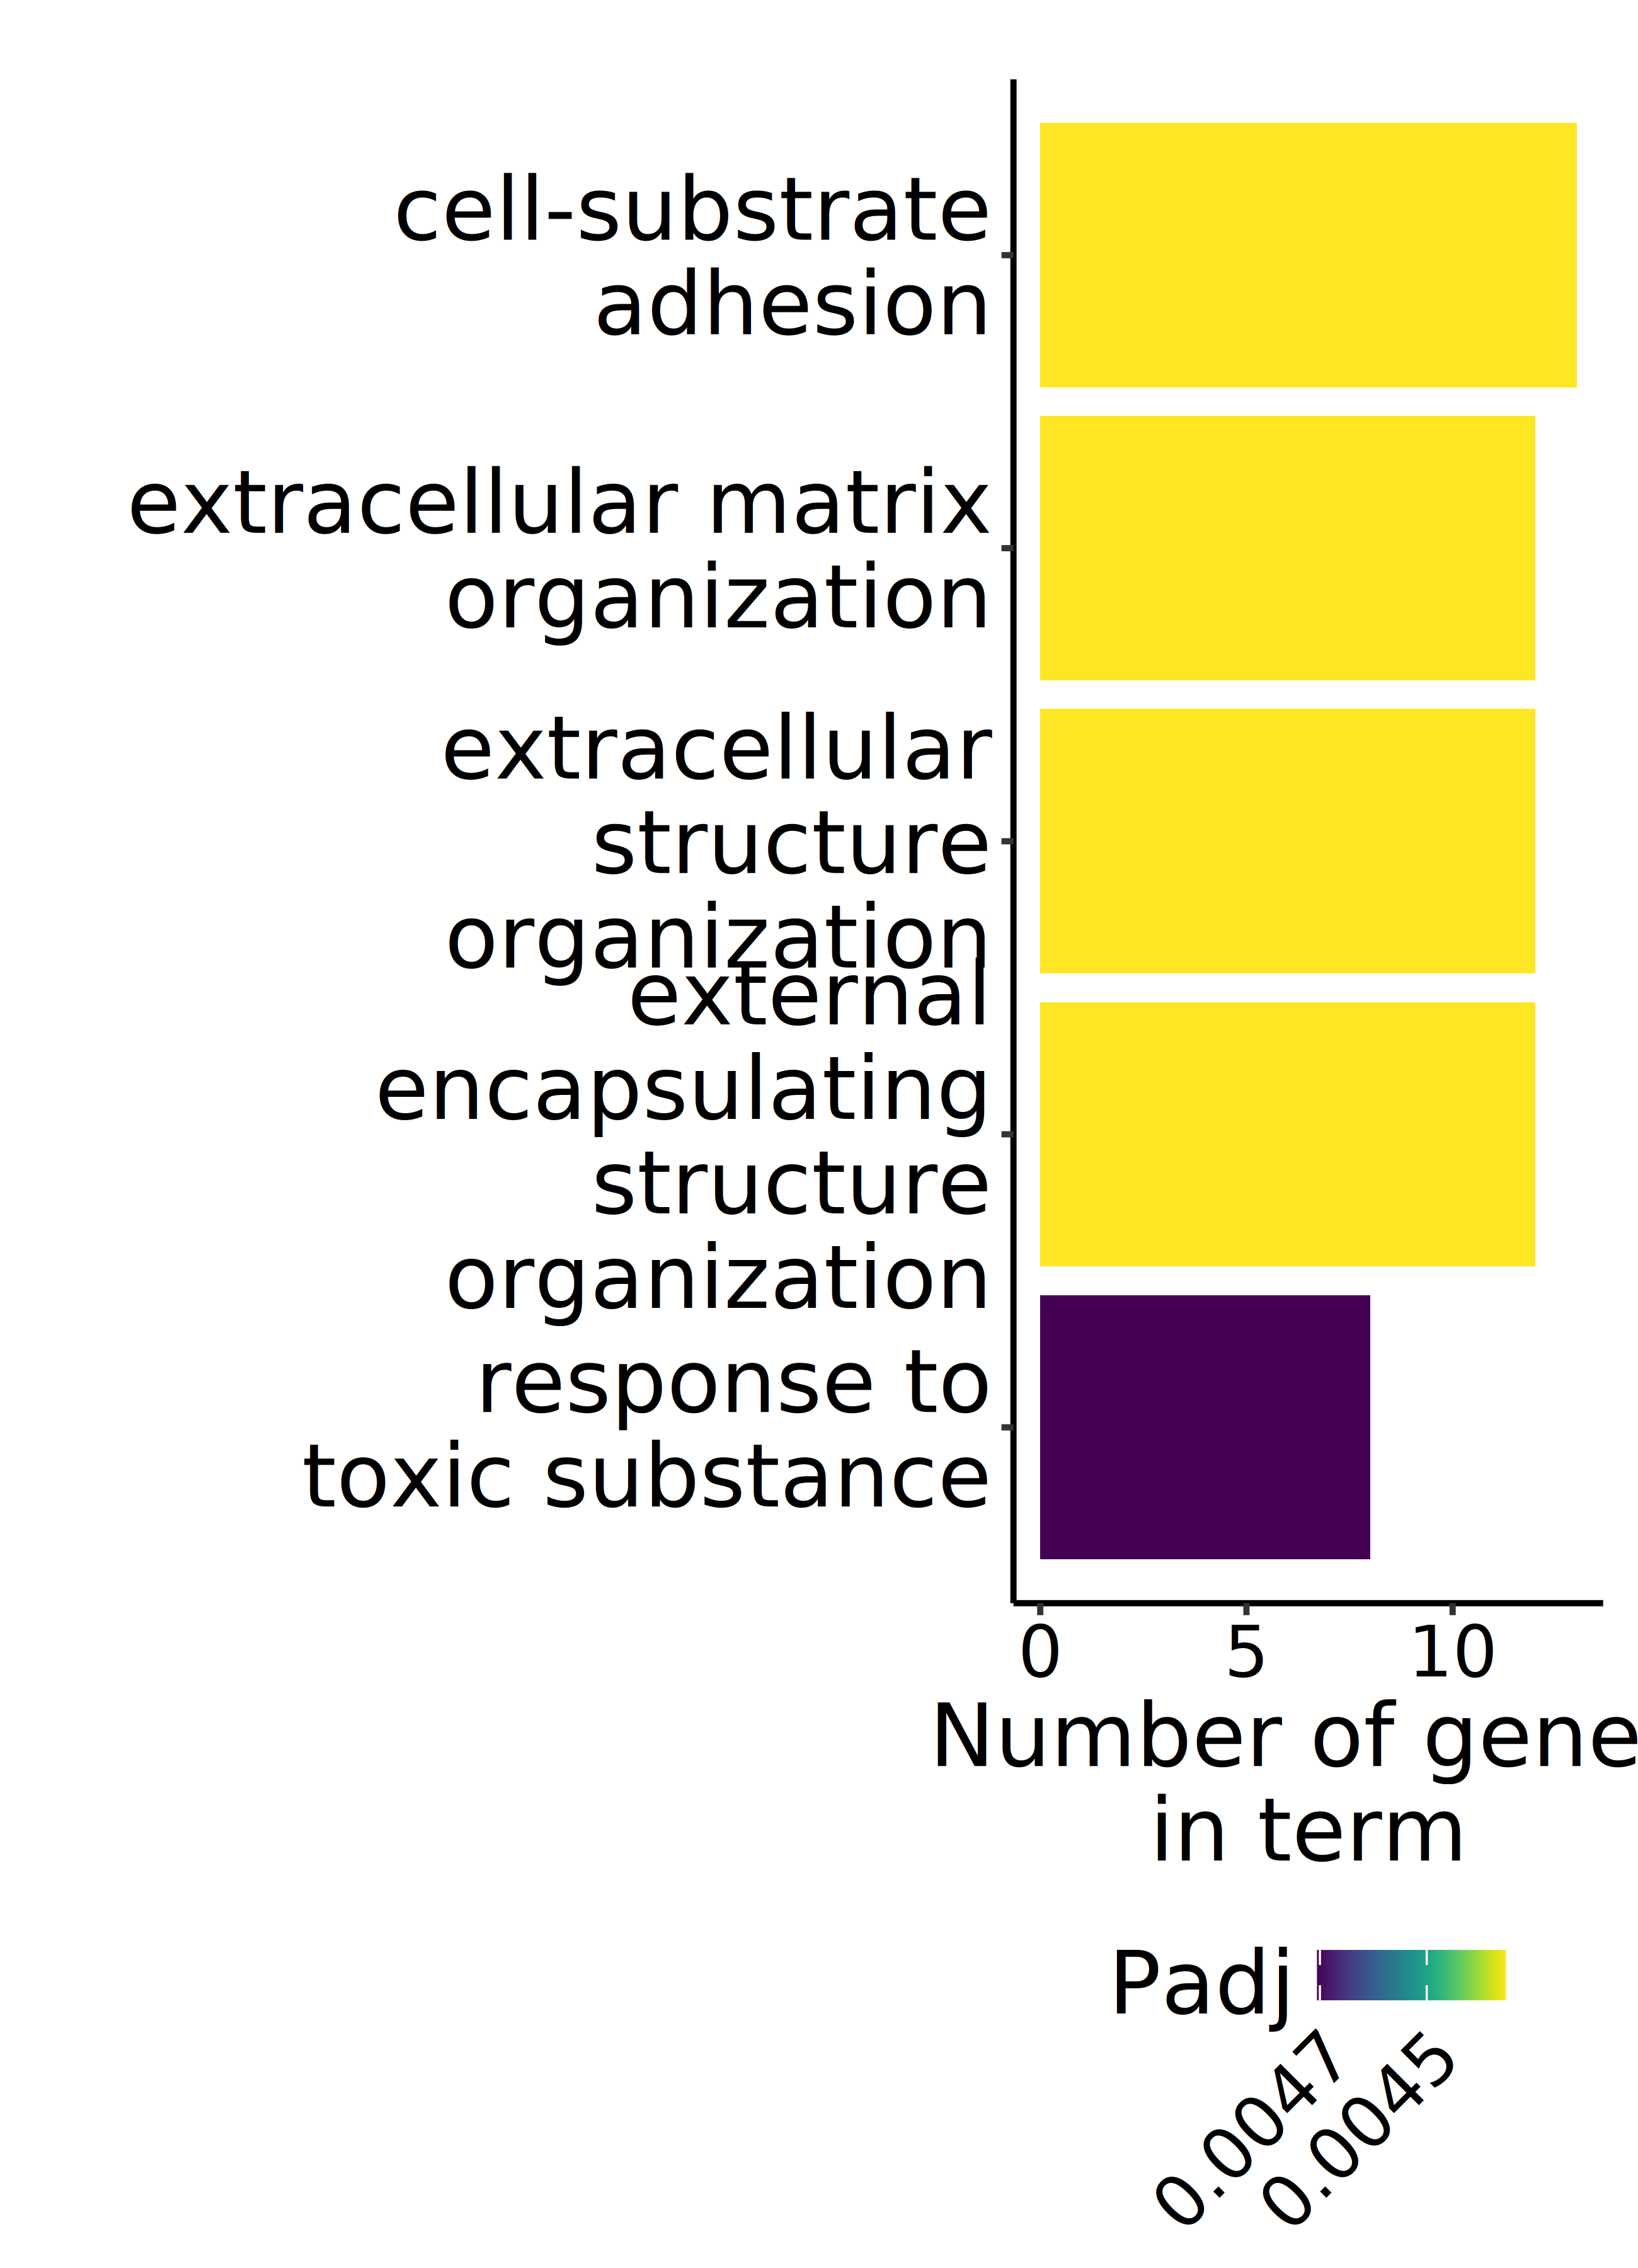

In [60]:
# GR-dependent clusters
options(repr.plot.width=5.2, repr.plot.height=7.2,repr.plot.res=500)
barplot(c1_c2_ego, showCategory=5) + theme_classic() + theme(axis.text = element_text(color = 'black',size=16),
                                                          axis.text.y = element_text(size=20),
                                                          axis.title.y = element_blank(), 
                                                          axis.title.x = element_text(size=20), 
                                                          legend.key.height = unit(0.8, "lines"),
                                                             legend.text = element_text(color = 'black',size=16,angle=45,hjust=1),
                                                             legend.key.width = unit(0.6, "lines"),
                                                             legend.title = element_text(size=20,hjust = 0.5, vjust = 1),
                                                             legend.position = 'bottom',
                                                          plot.margin = margin(0, 8, 0, 30)) + xlab('Number of genes\nin term') +
scale_fill_viridis(option='viridis',
                      name = 'Padj', 
                      trans = "reverse", 
                      guide = "colourbar",
                      breaks = rev(c(0.0047,0.0045)))

In [61]:
# Add line breaks for plotting
c3_c4_ego@result$Description <- gsub('axon ensheathment in central nervous system',
                                     'axon ensheathment\nin central nervous system',
                                     c3_c4_ego@result$Description)
c3_c4_ego@result$Description <- gsub('ensheathment of neurons',
                                     'ensheathment\nof neurons',
                                     c3_c4_ego@result$Description)
c3_c4_ego@result$Description <- gsub('central nervous system myelination',
                                     'central nervous\nsystem myelination',
                                     c3_c4_ego@result$Description)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


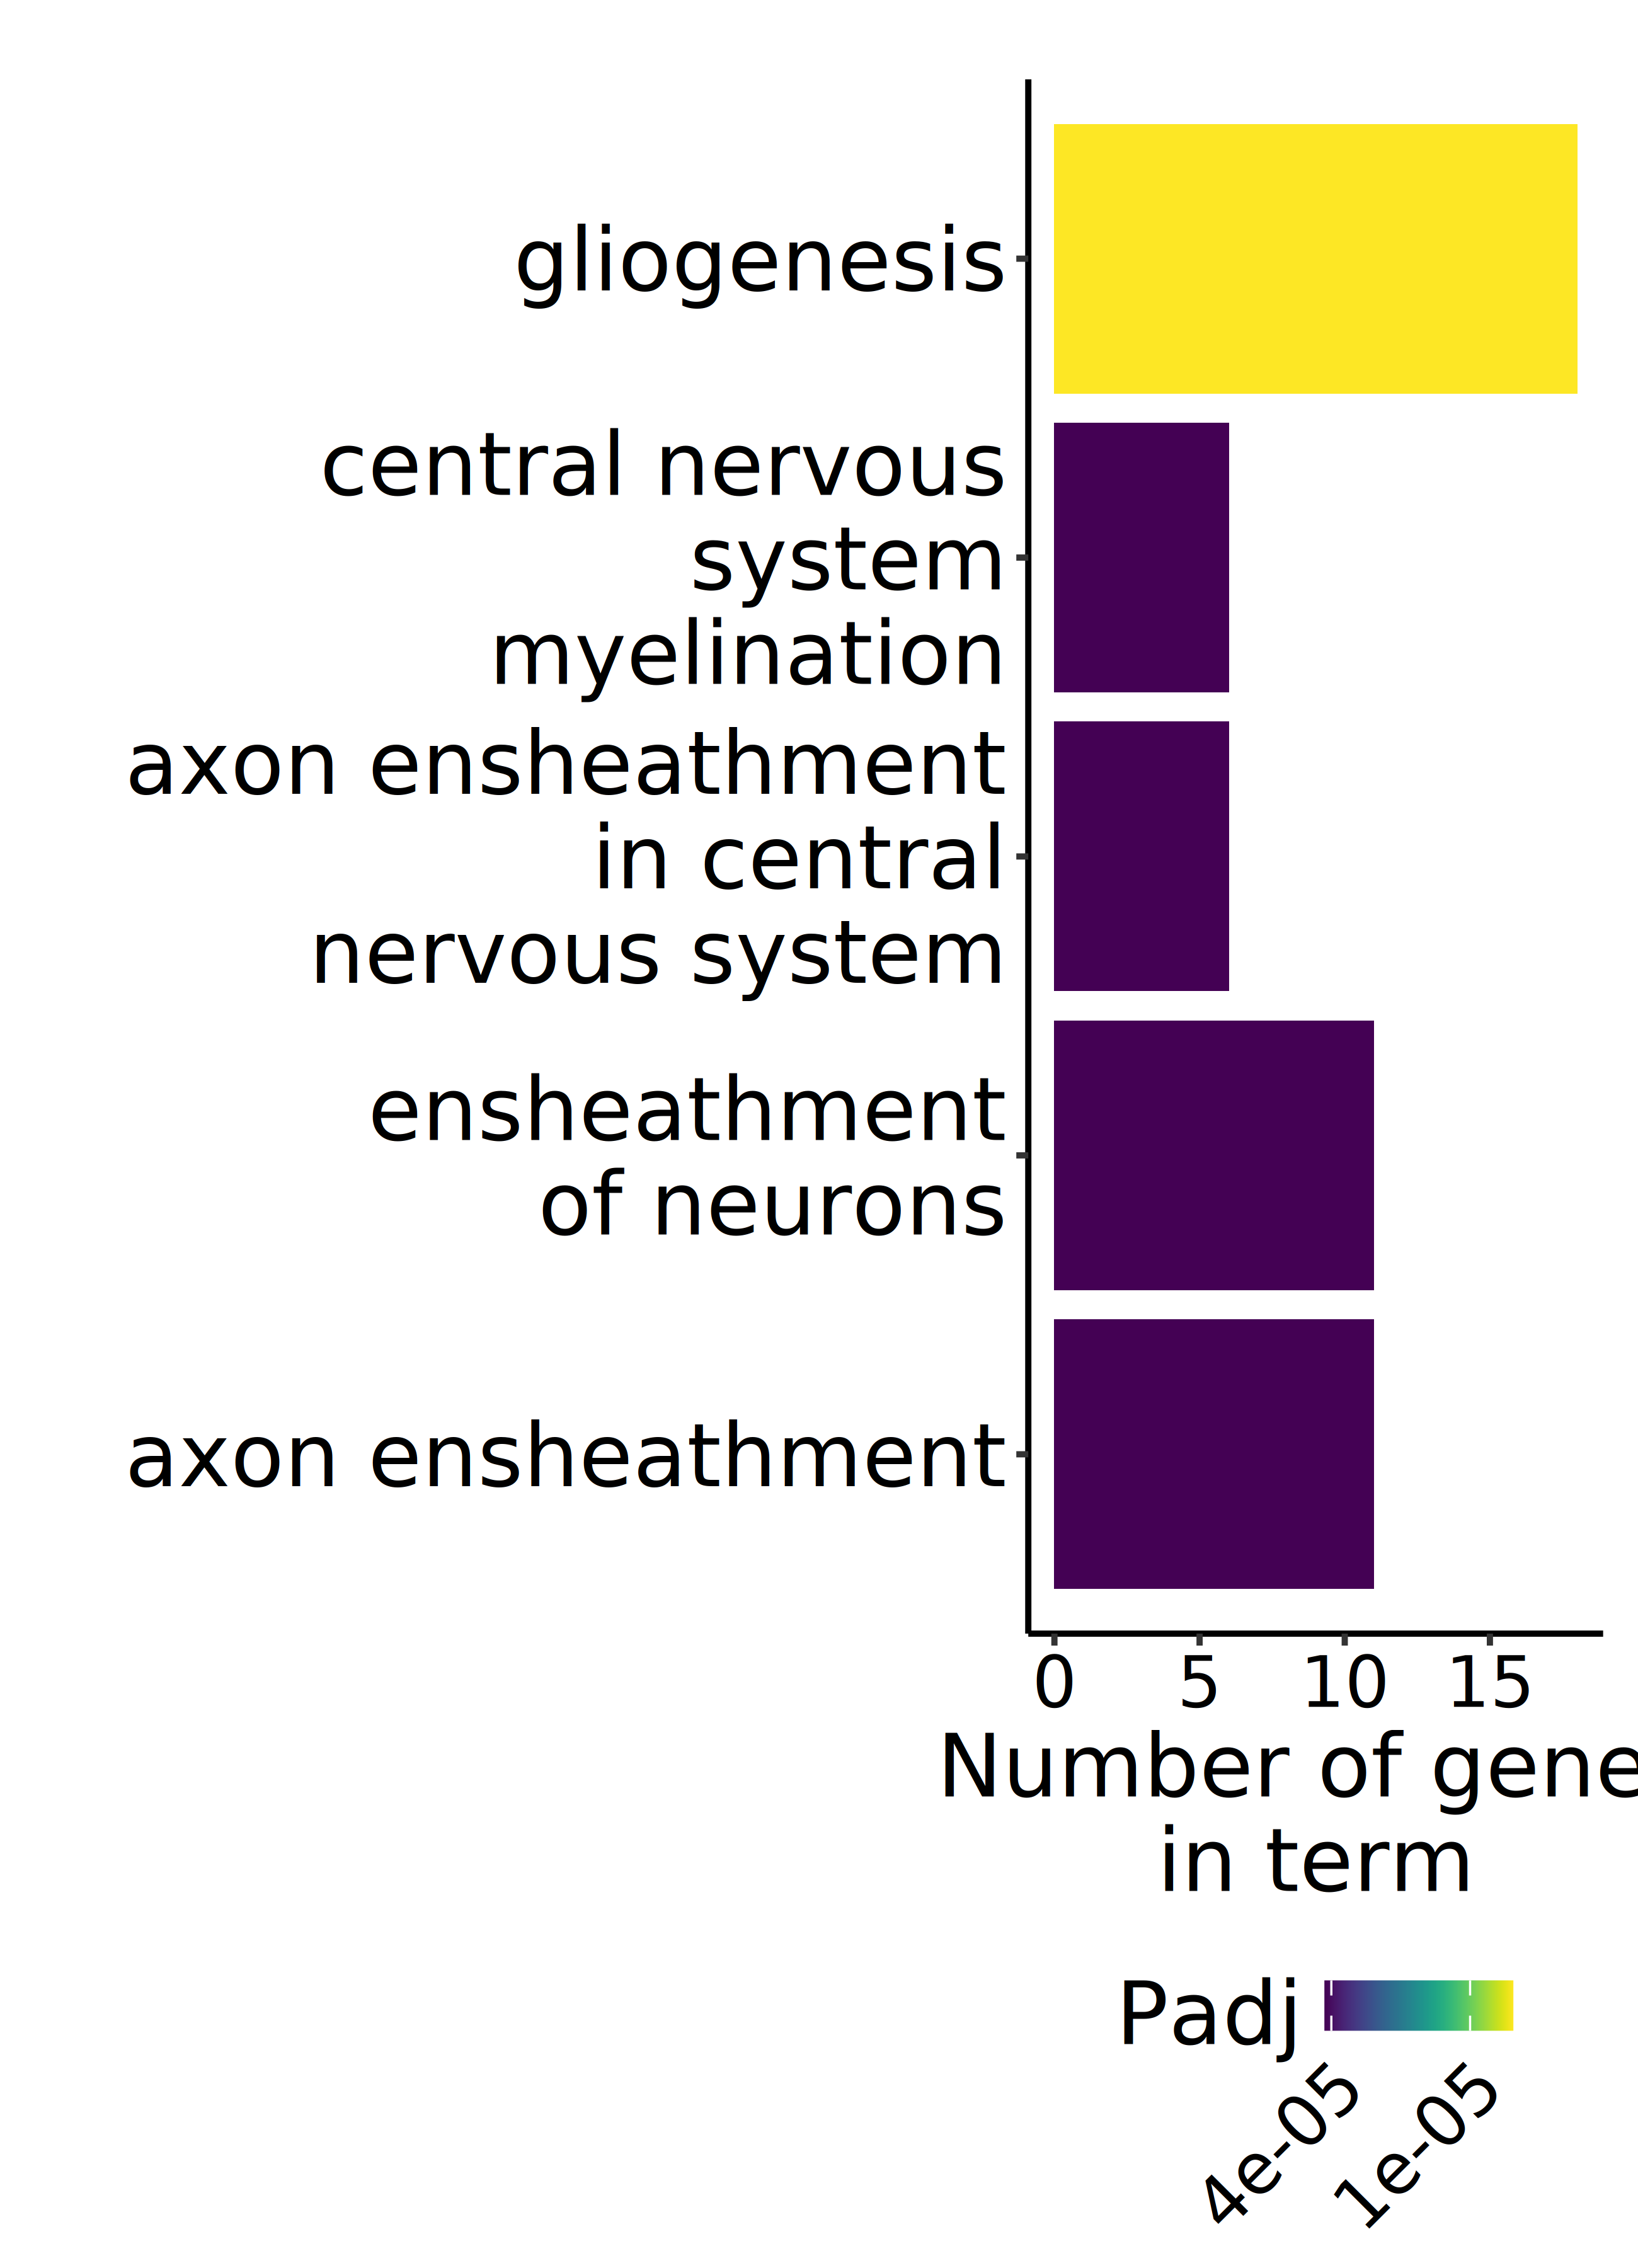

In [62]:
# GR-independent clusters
options(repr.plot.width=5.2, repr.plot.height=7.2,repr.plot.res=500)
barplot(c3_c4_ego, showCategory=5) + theme_classic() + theme(axis.text = element_text(color = 'black',size=16),
                                                          axis.text.y = element_text(size=20),
                                                          axis.title.y = element_blank(), 
                                                          axis.title.x = element_text(size=20), 
                                                          legend.key.height = unit(0.8, "lines"),
                                                             legend.text = element_text(color = 'black',size=16,angle=45,hjust=1),
                                                             legend.key.width = unit(0.6, "lines"),
                                                             legend.title = element_text(size=20,hjust = 0.5, vjust = 1),
                                                             legend.position = 'bottom',
                                                          plot.margin = margin(0, 8, 0, 30)) + xlab('Number of genes\nin term') +
scale_fill_viridis(option='viridis',
                      name = 'Padj', 
                      trans = "reverse", 
                      guide = "colourbar",
                      breaks = rev(c(4e-5,1e-5)))